In [1]:
import uproot, os
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2sf21rbr because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Single samples samples

In [2]:
out_dir='../analysis_run3/AN_Note_Plot/HToAATo4Tau_gen_plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [3]:
# ! ls ../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples

In [13]:
# file = uproot.open("data/GenInfo_only_90.root")
file_m3p7 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M3p7_combined.root")
file_m4 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M4_combined.root")
file_m5 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M5_combined.root")
file_m6 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M6_combined.root")
file_m8 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M8_combined.root")
file_m10 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M10_combined.root")
file_m12 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M12_combined.root")
file_m14 = uproot.open("../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M14_combined.root")

RHTree_m3p7 = file_m3p7["fevt/RHTree"]
RHTree_m4 = file_m4["fevt/RHTree"]
RHTree_m5 = file_m5["fevt/RHTree"]
RHTree_m6 = file_m6["fevt/RHTree"]
RHTree_m8 = file_m8["fevt/RHTree"]
RHTree_m10 = file_m10["fevt/RHTree"]
RHTree_m12 = file_m12["fevt/RHTree"]
RHTree_m14 = file_m14["fevt/RHTree"]


In [5]:
RHTree_list = [RHTree_m3p7, RHTree_m4, RHTree_m5, RHTree_m6, RHTree_m8, RHTree_m10, RHTree_m12, RHTree_m14]
signal_masses = [3.7, 4, 5, 6, 8, 10, 12, 14]

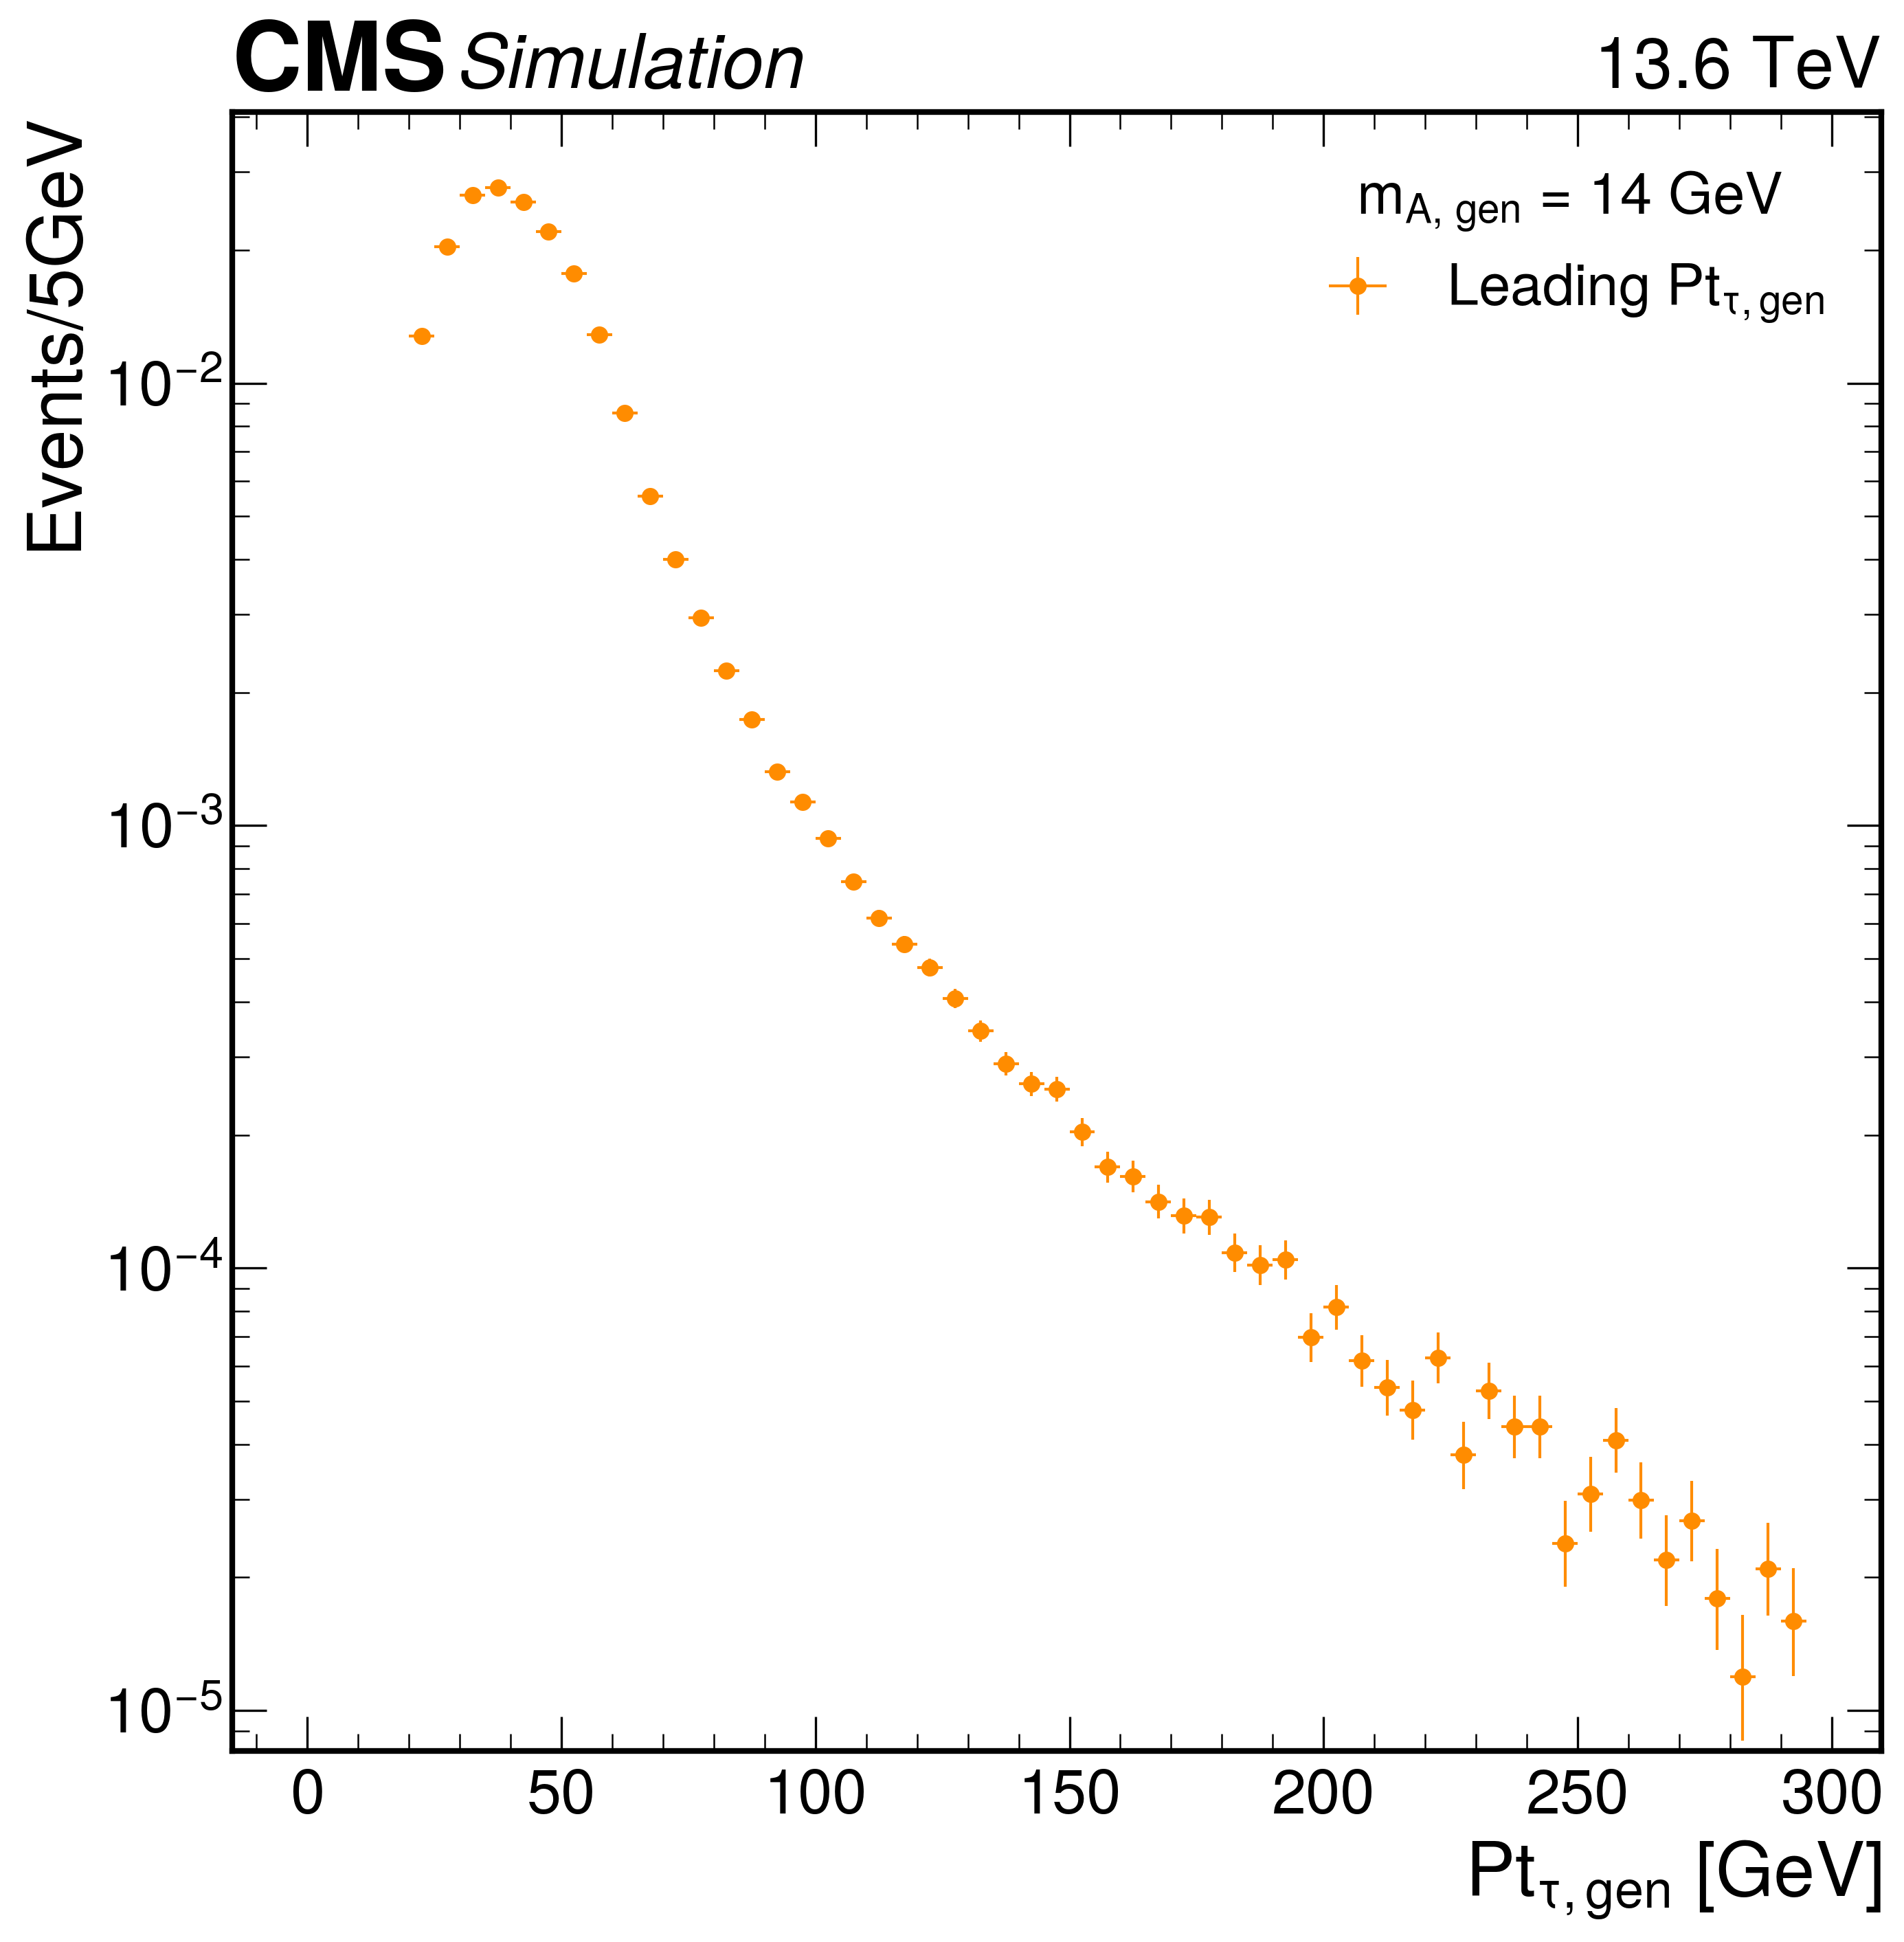

In [100]:

   
Tau1_pt = RHTree.arrays(["Tau1_pt"], "Tau1_pt > -111", library="pd")["Tau1_pt"]
Tau2_pt = RHTree.arrays(["Tau2_pt"], "Tau2_pt > -111", library="pd")["Tau2_pt"]

# Compute leading and subleading pT
pt_leading1 = np.maximum(Tau1_pt, Tau2_pt)
pt_subleading1 = np.minimum(Tau1_pt, Tau2_pt)



# Plot
fig, ax = plt.subplots(dpi=300)

bins = np.arange(0, 300, 5)

H= np.histogram(pt_leading1, bins=bins)
hep.histplot(H, histtype="errorbar",yerr=True, xerr=2.5, ax=ax, linewidth=2, color='darkorange', label=r"Leading $Pt_{\tau, gen}$", density=1) 
ax.set_xlabel(r"$Pt_{\tau, gen}$ [GeV]")
ax.set_ylabel("Events/5GeV")
legend = ax.legend( loc='upper right',title=f"$m_{{A,\\,gen}}$ = {signal_mass} GeV", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
signal_mass_str =  str(signal_mass).replace('.', 'p')
ax.set_yscale('log')

plt.show()

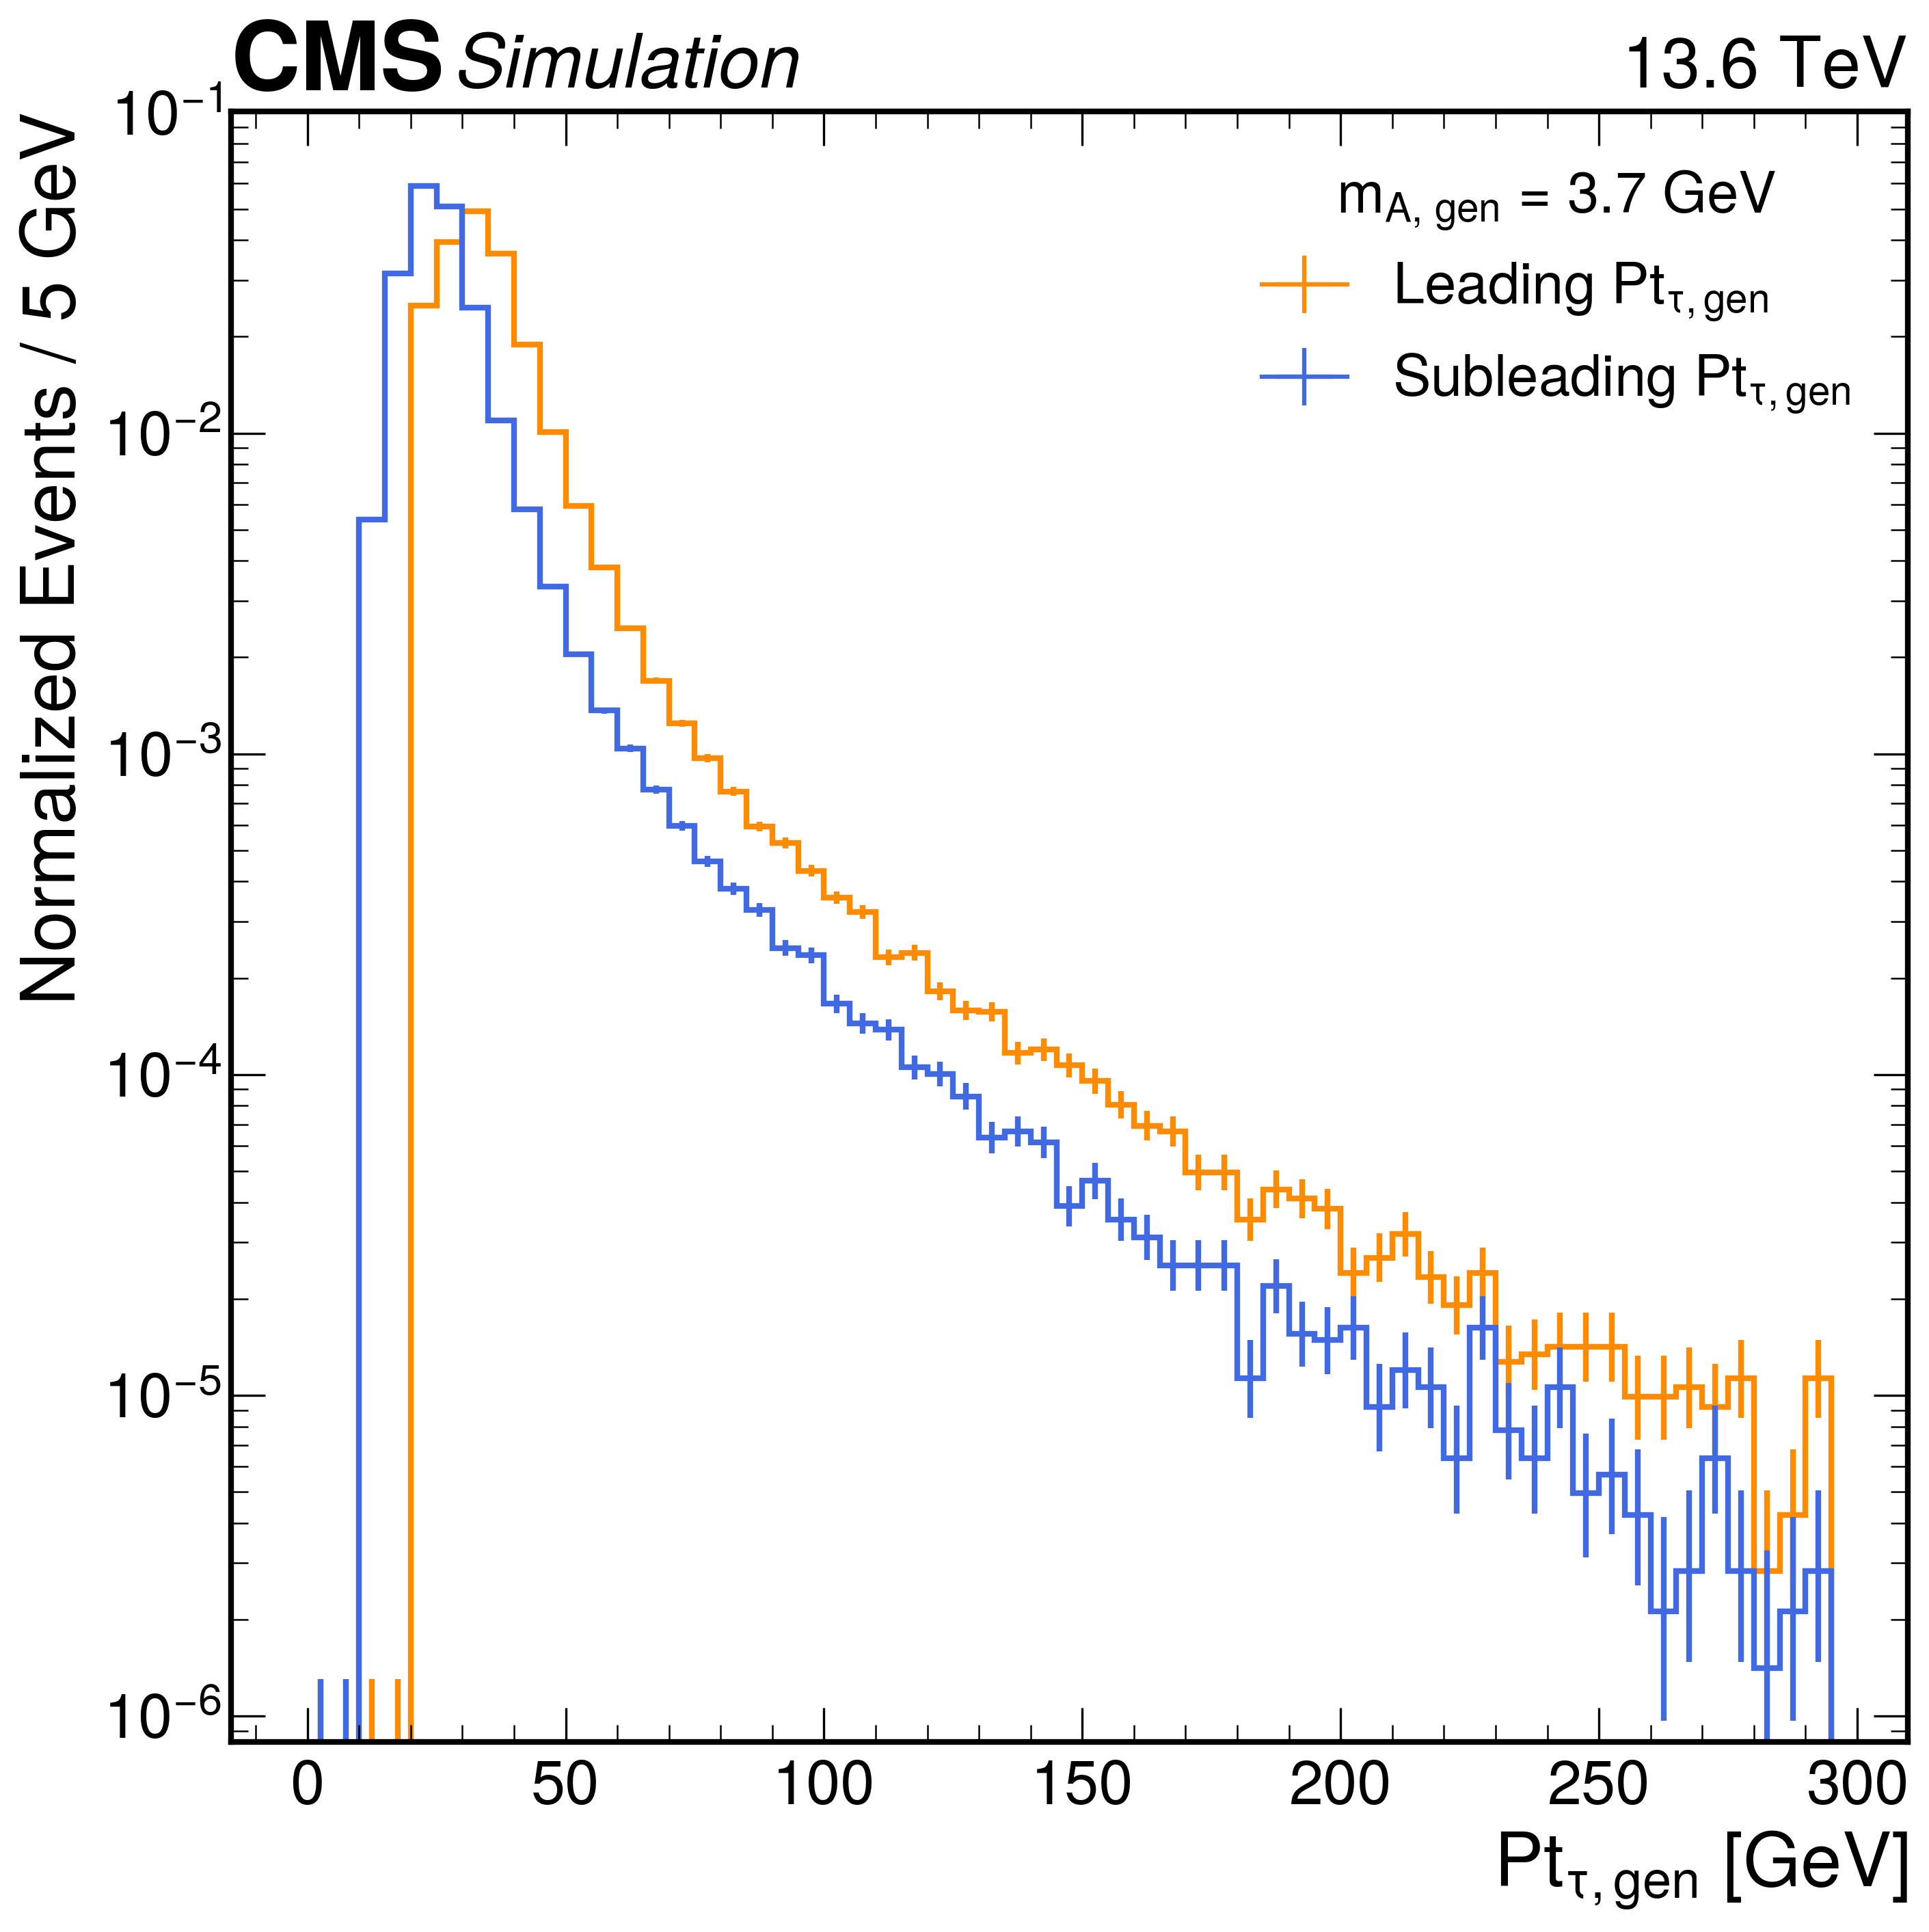

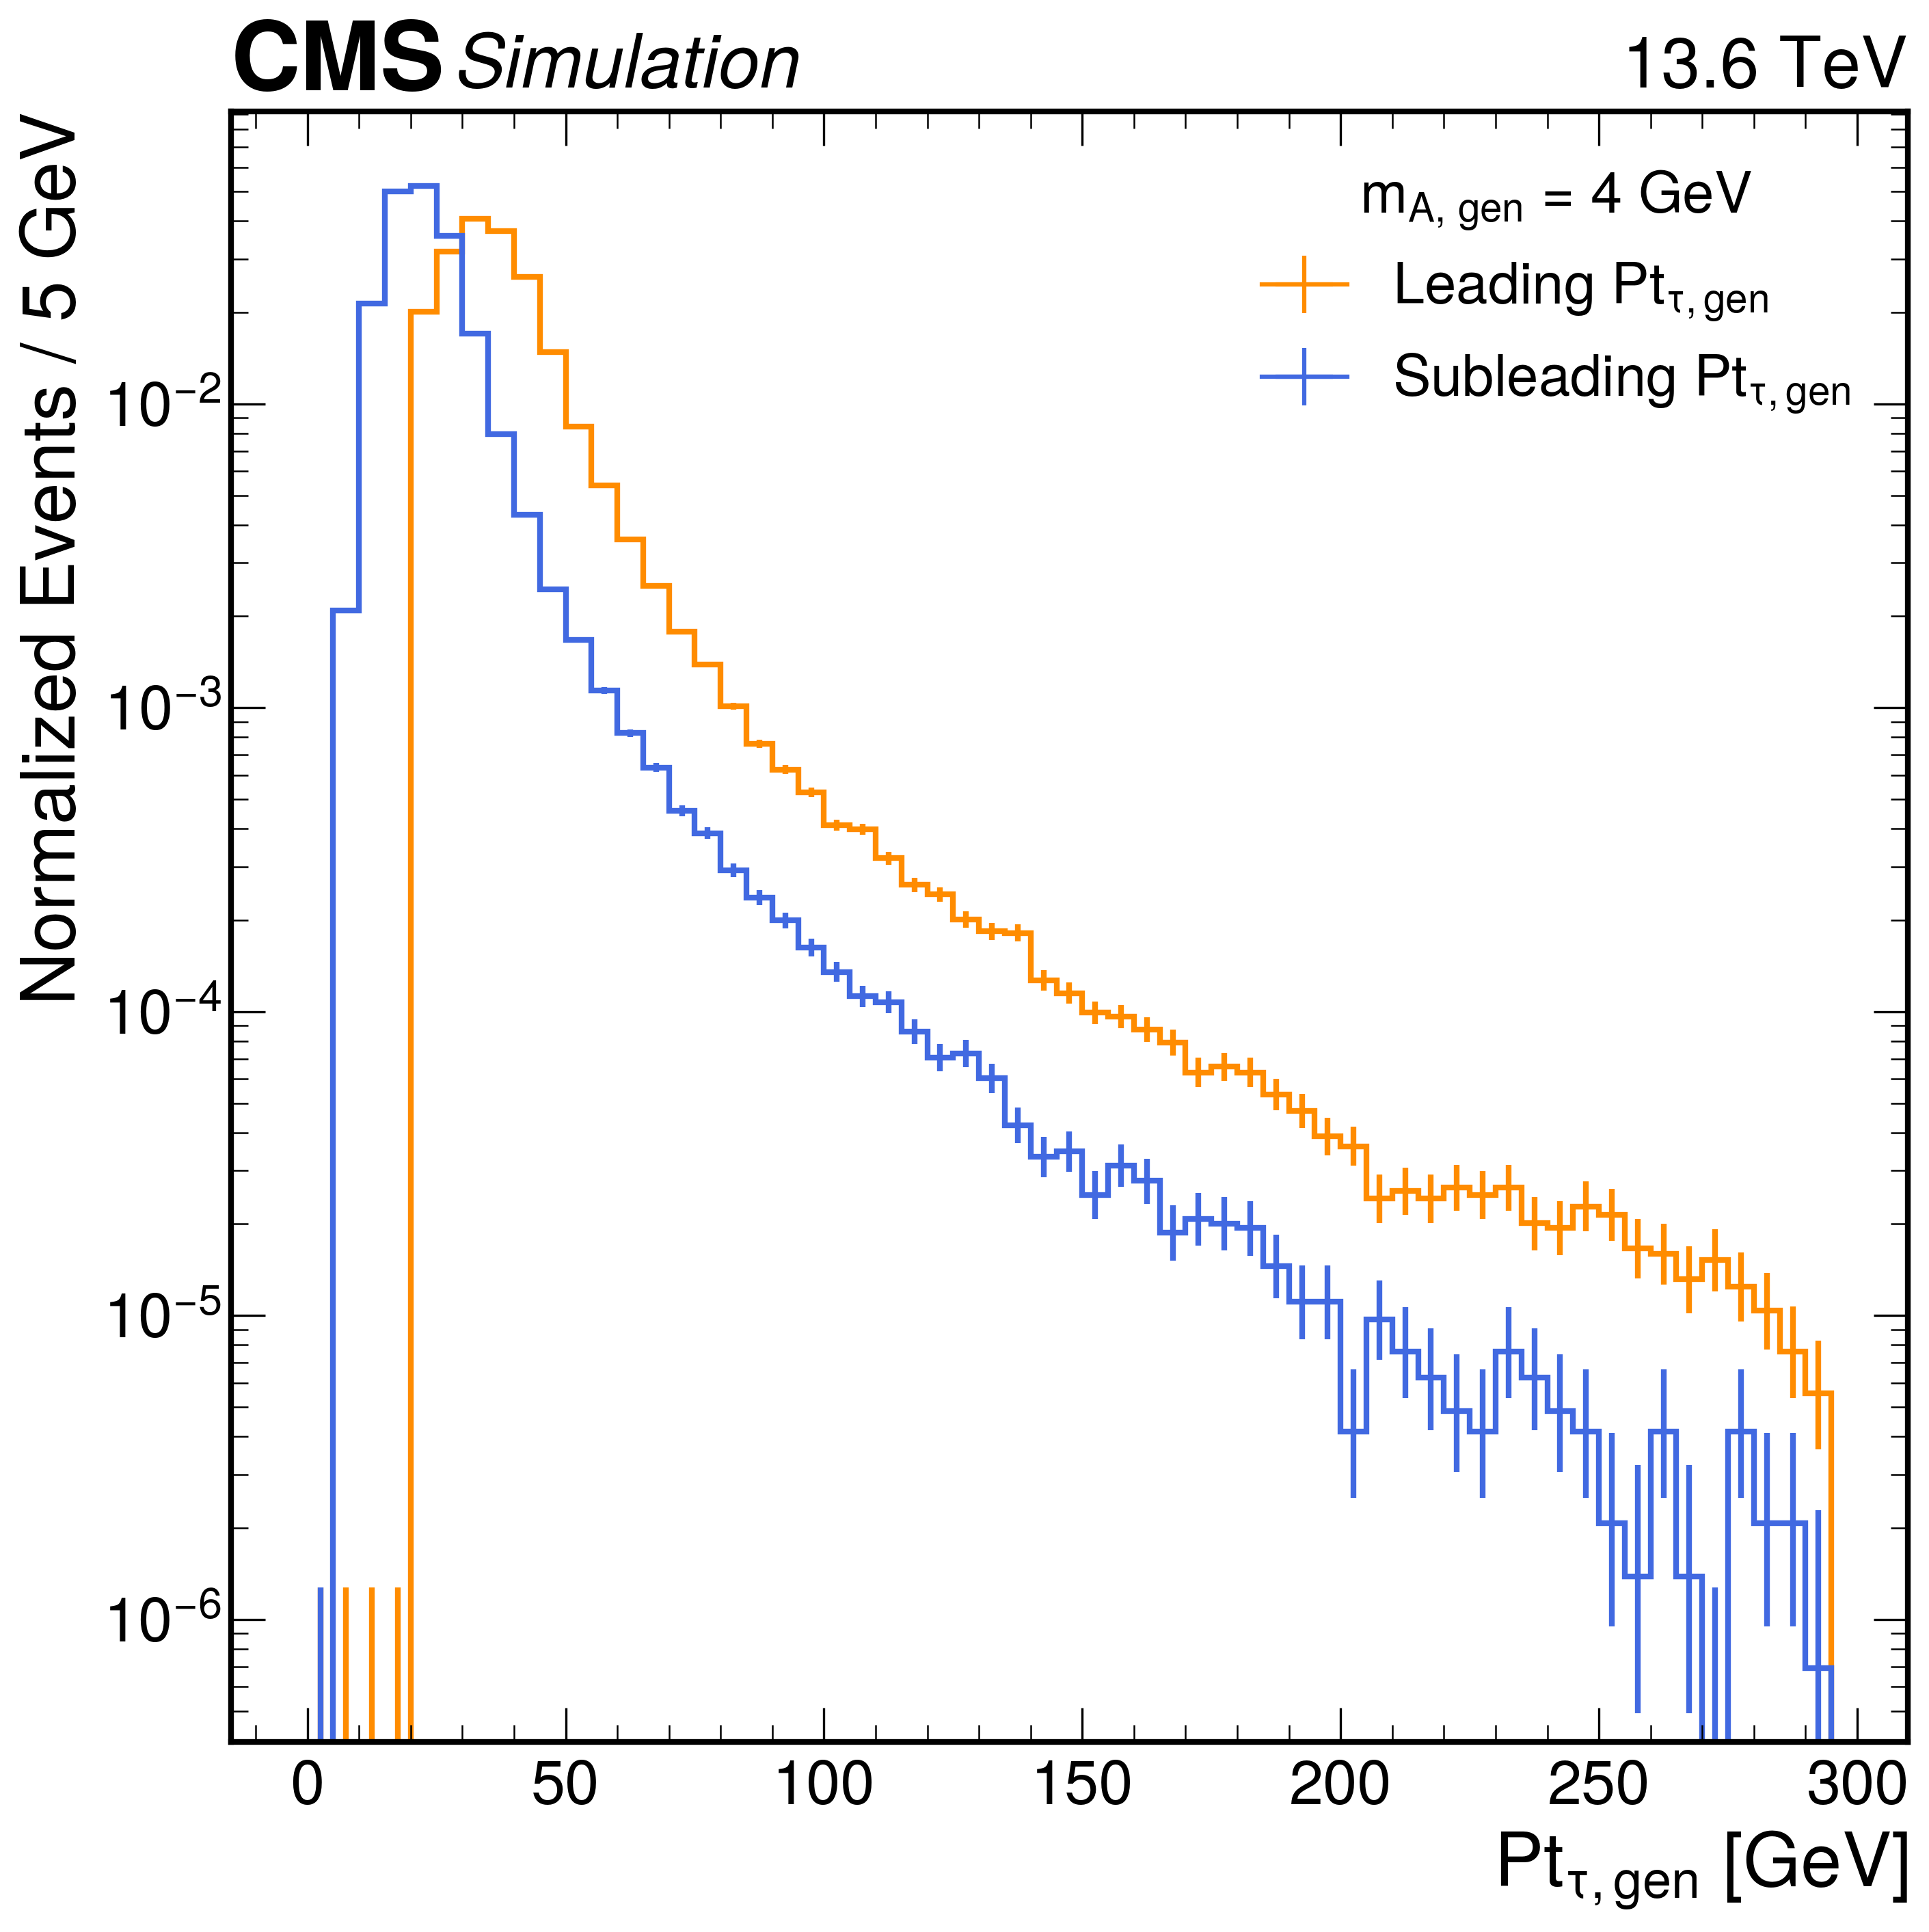

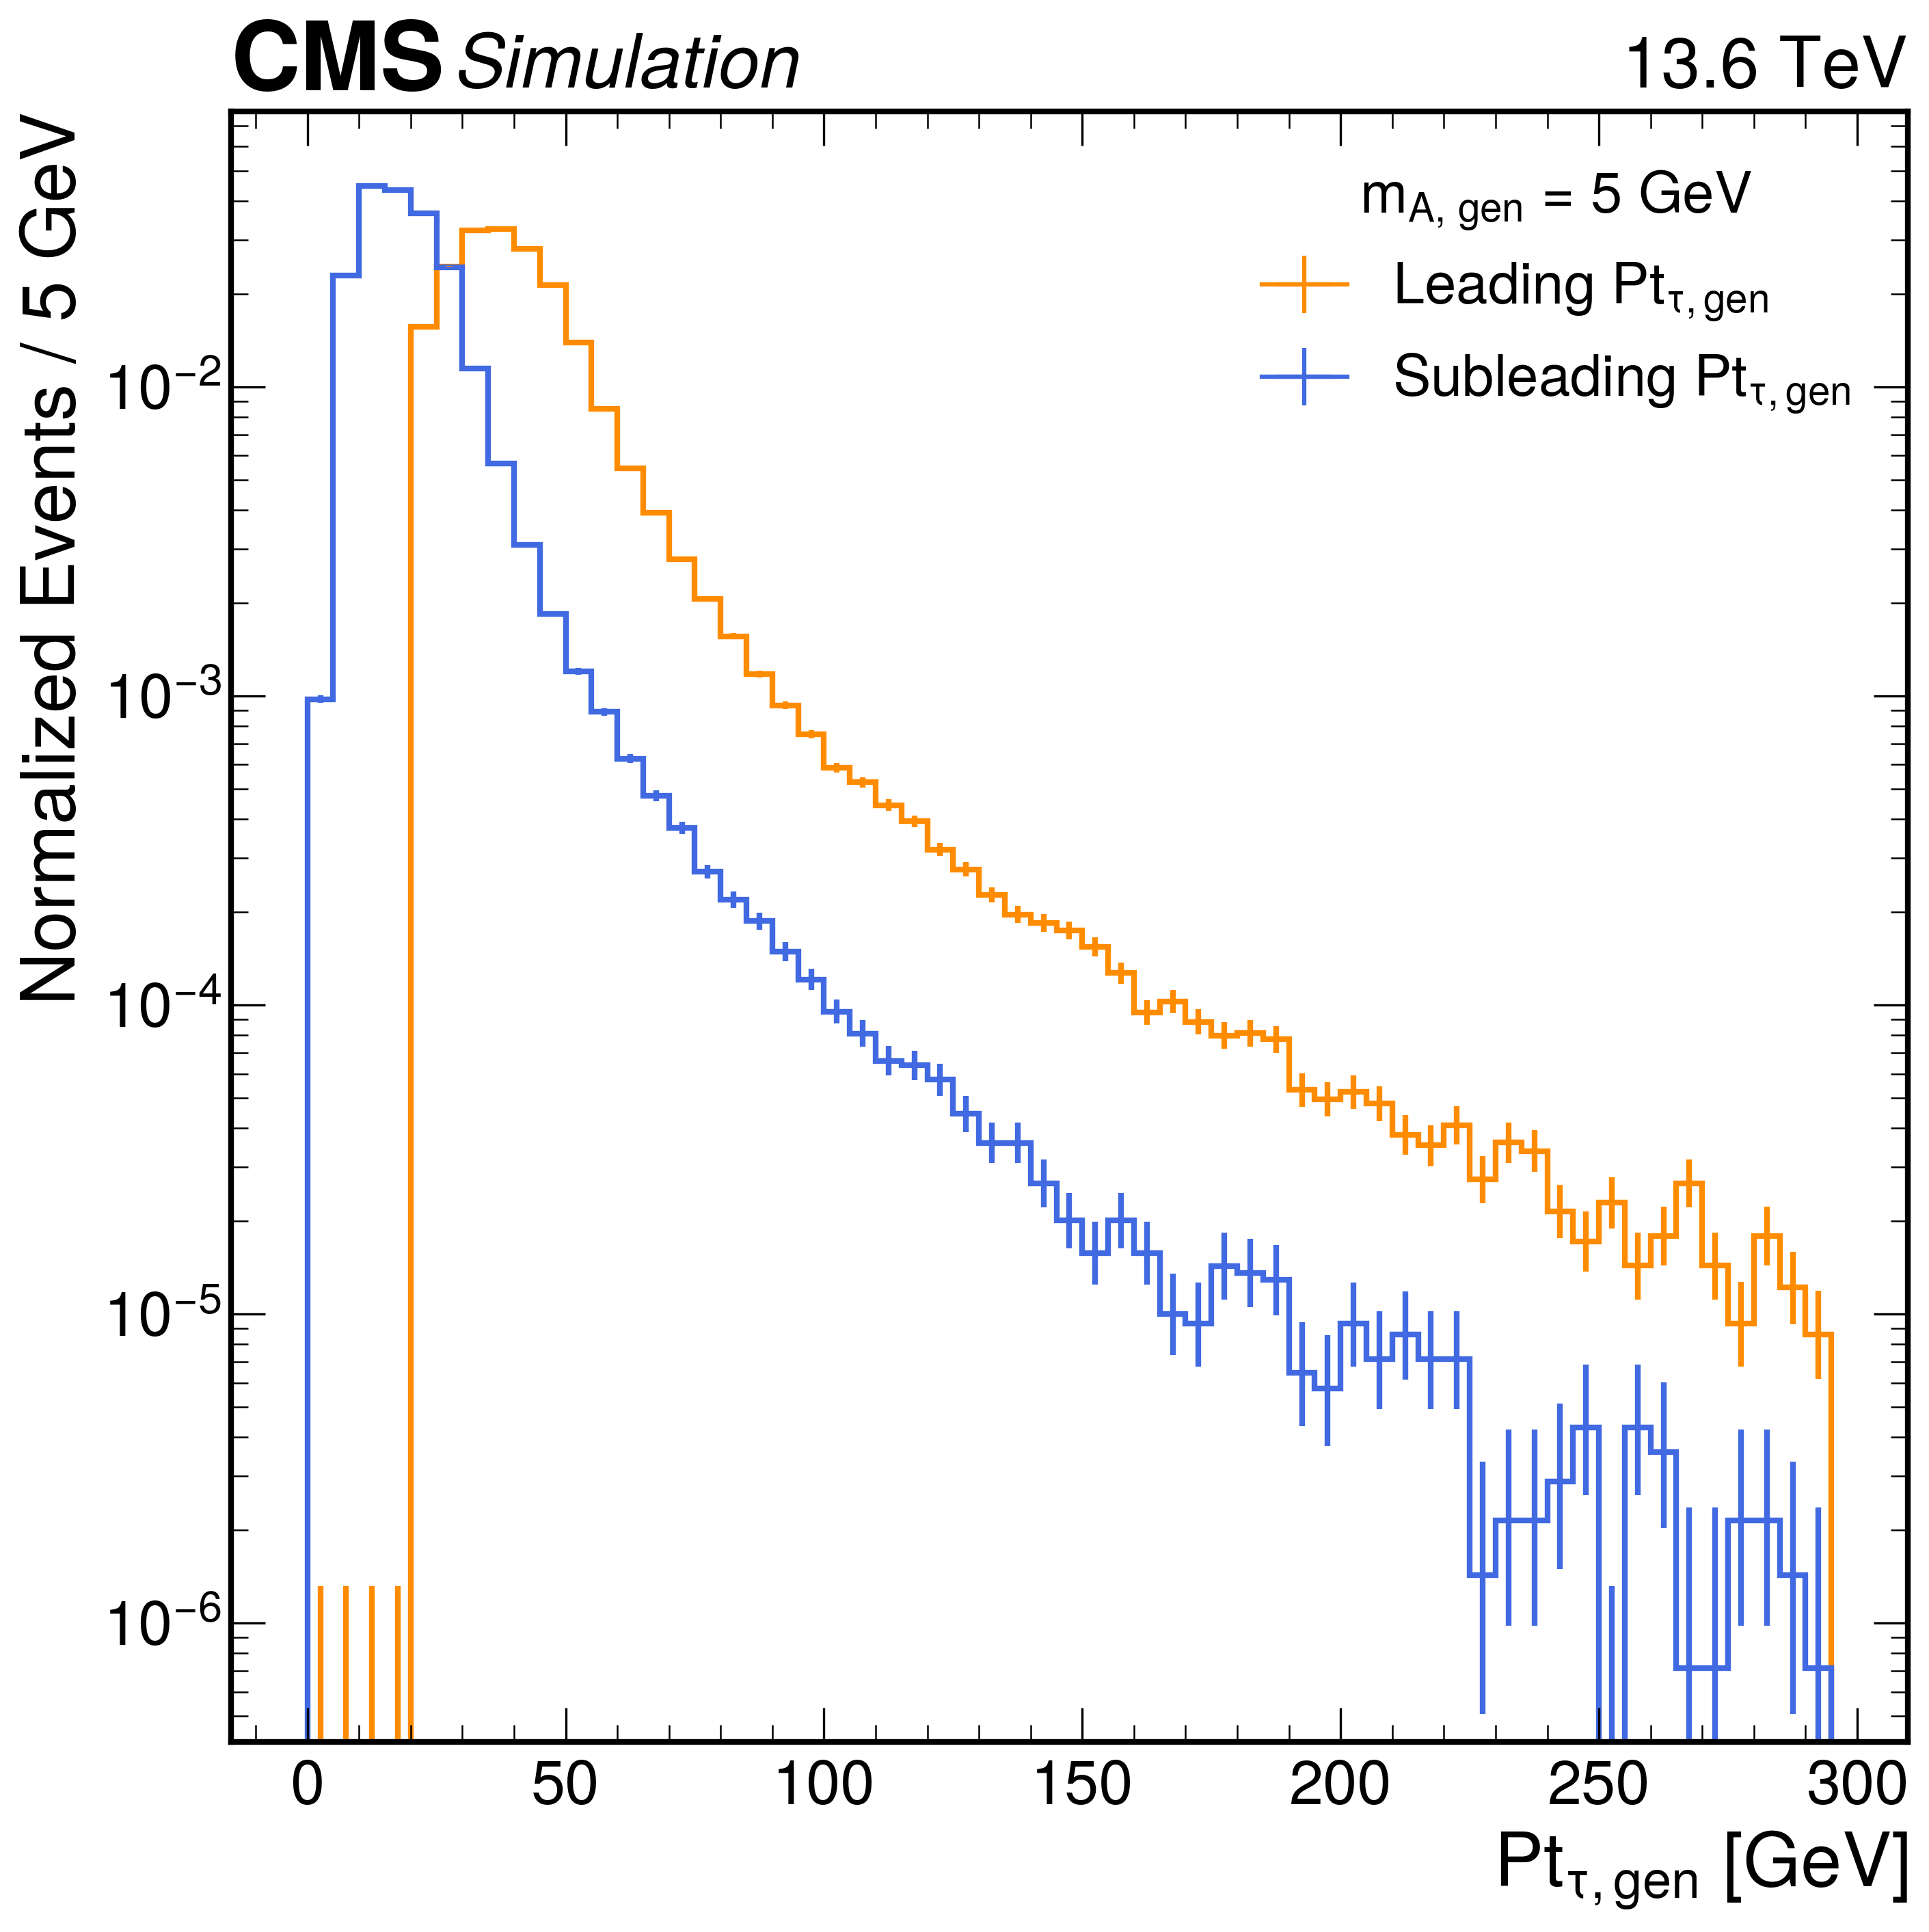

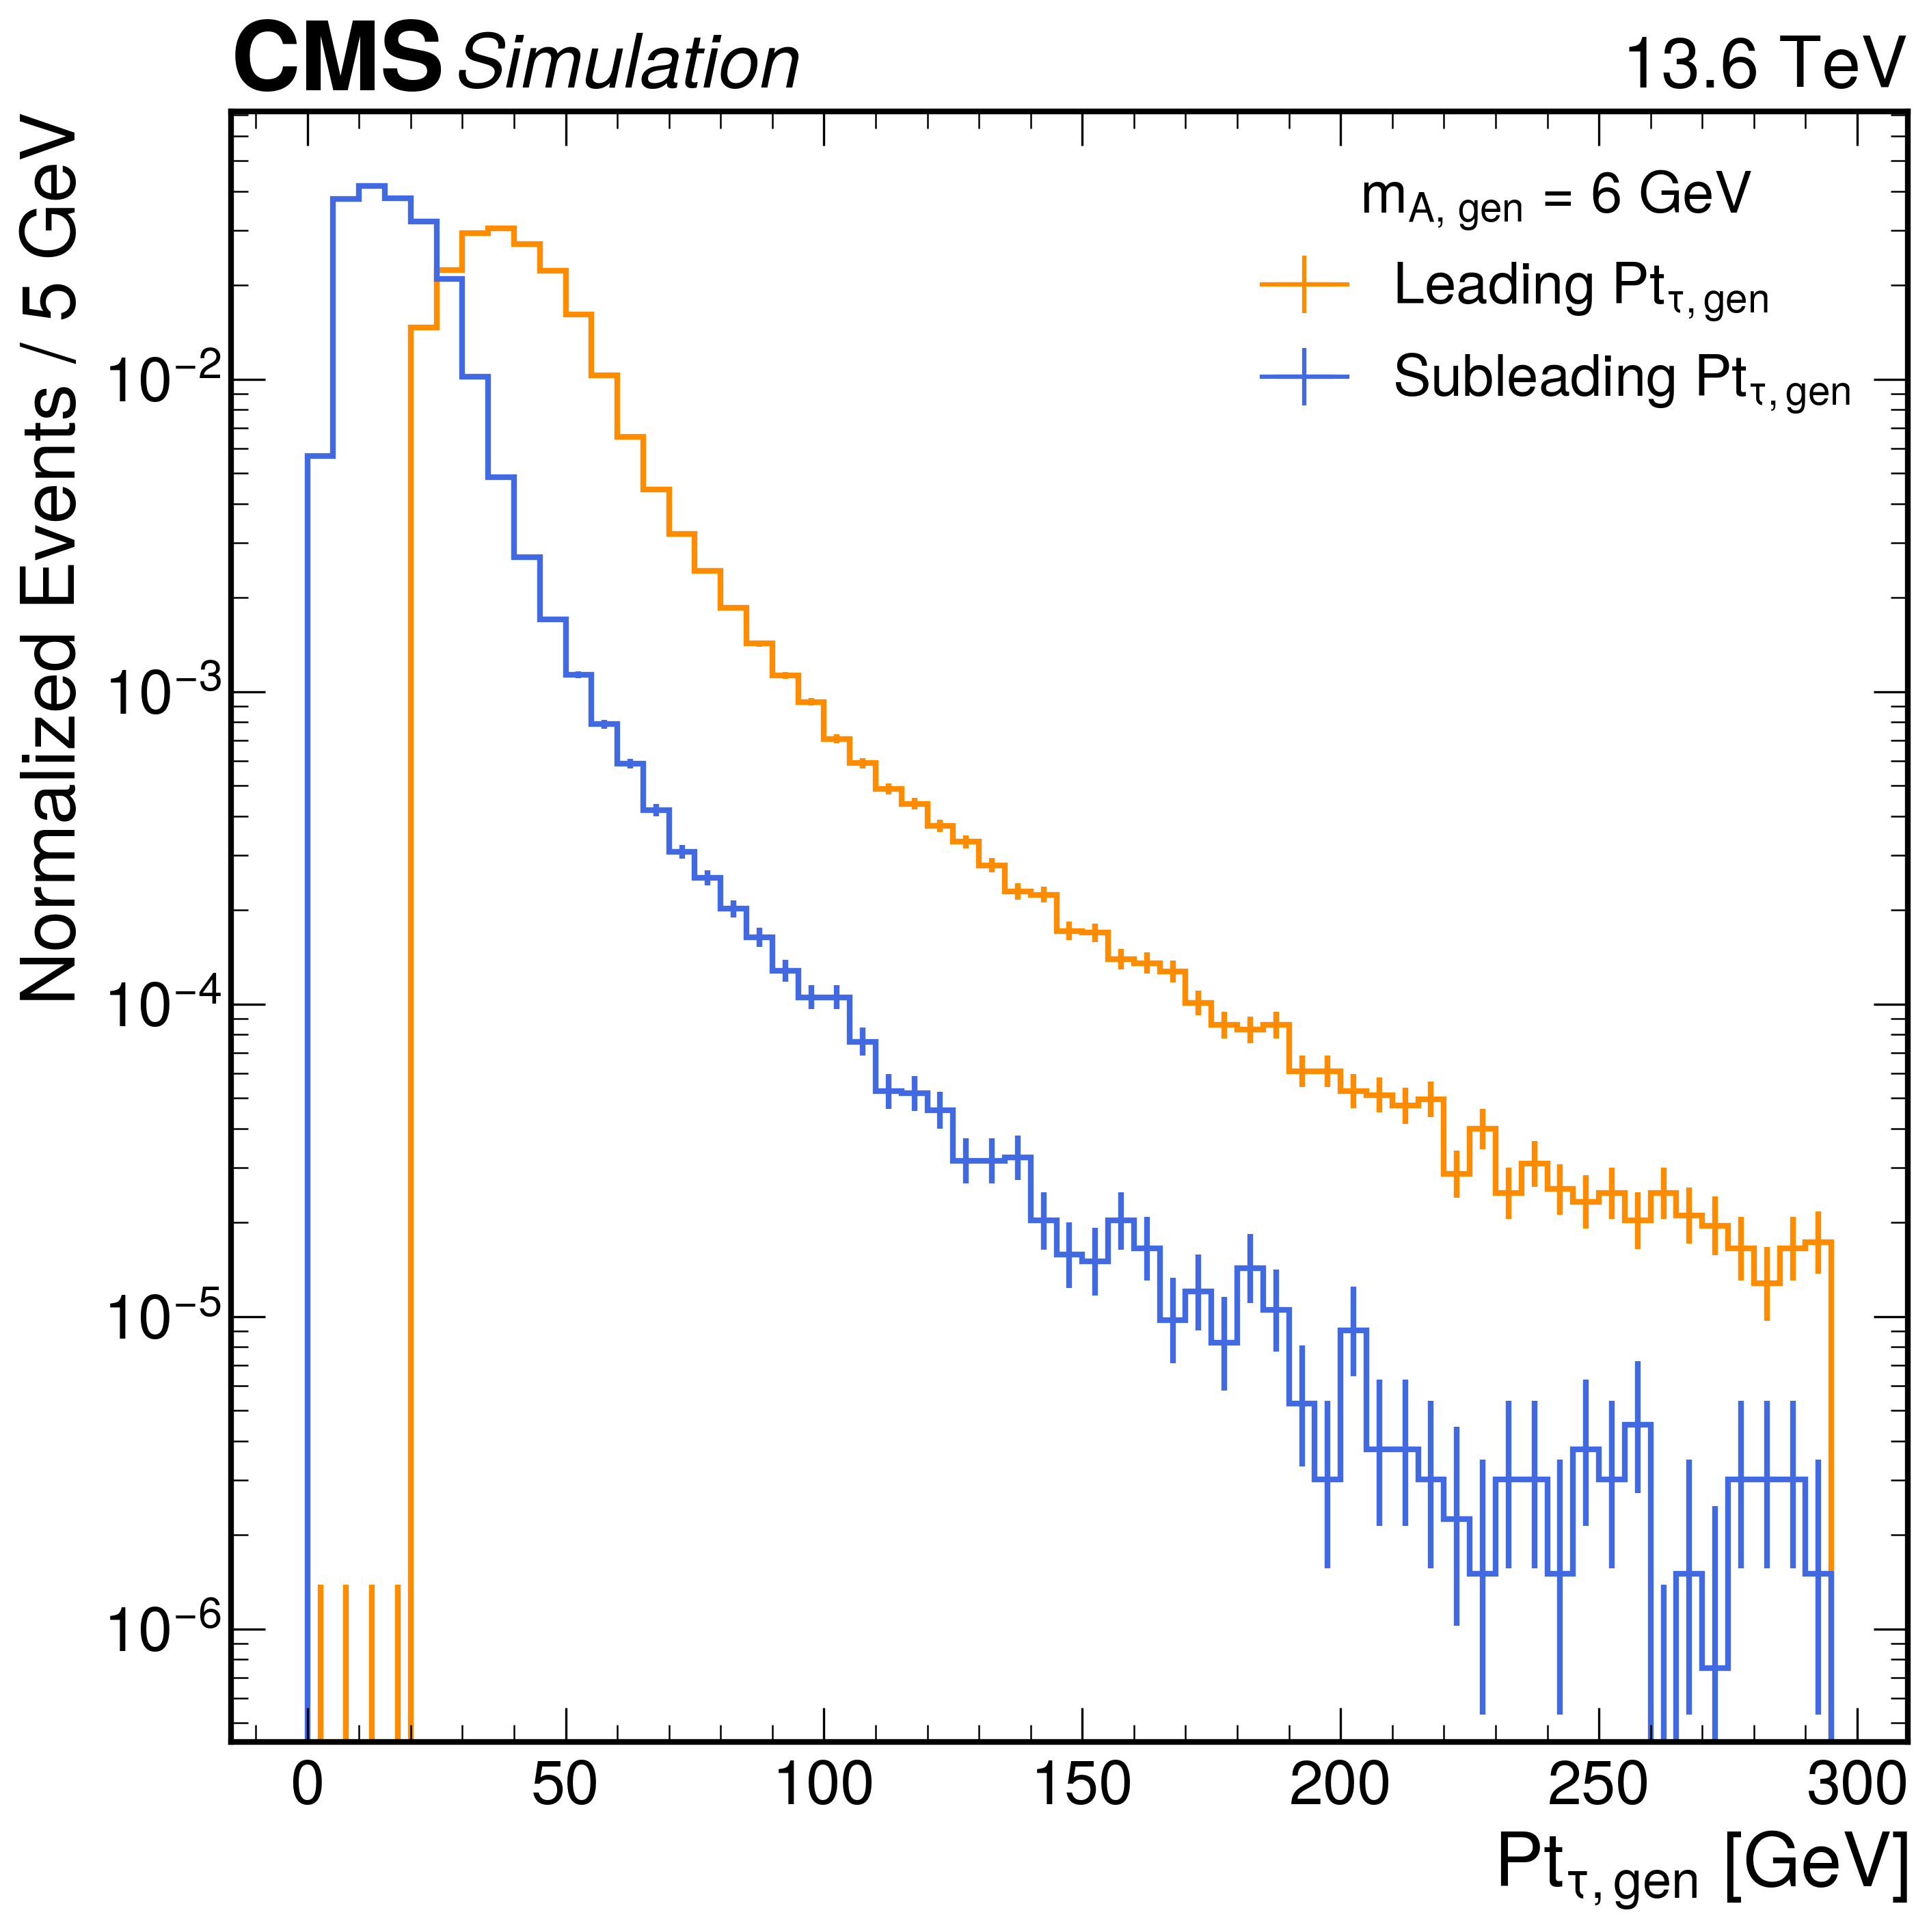

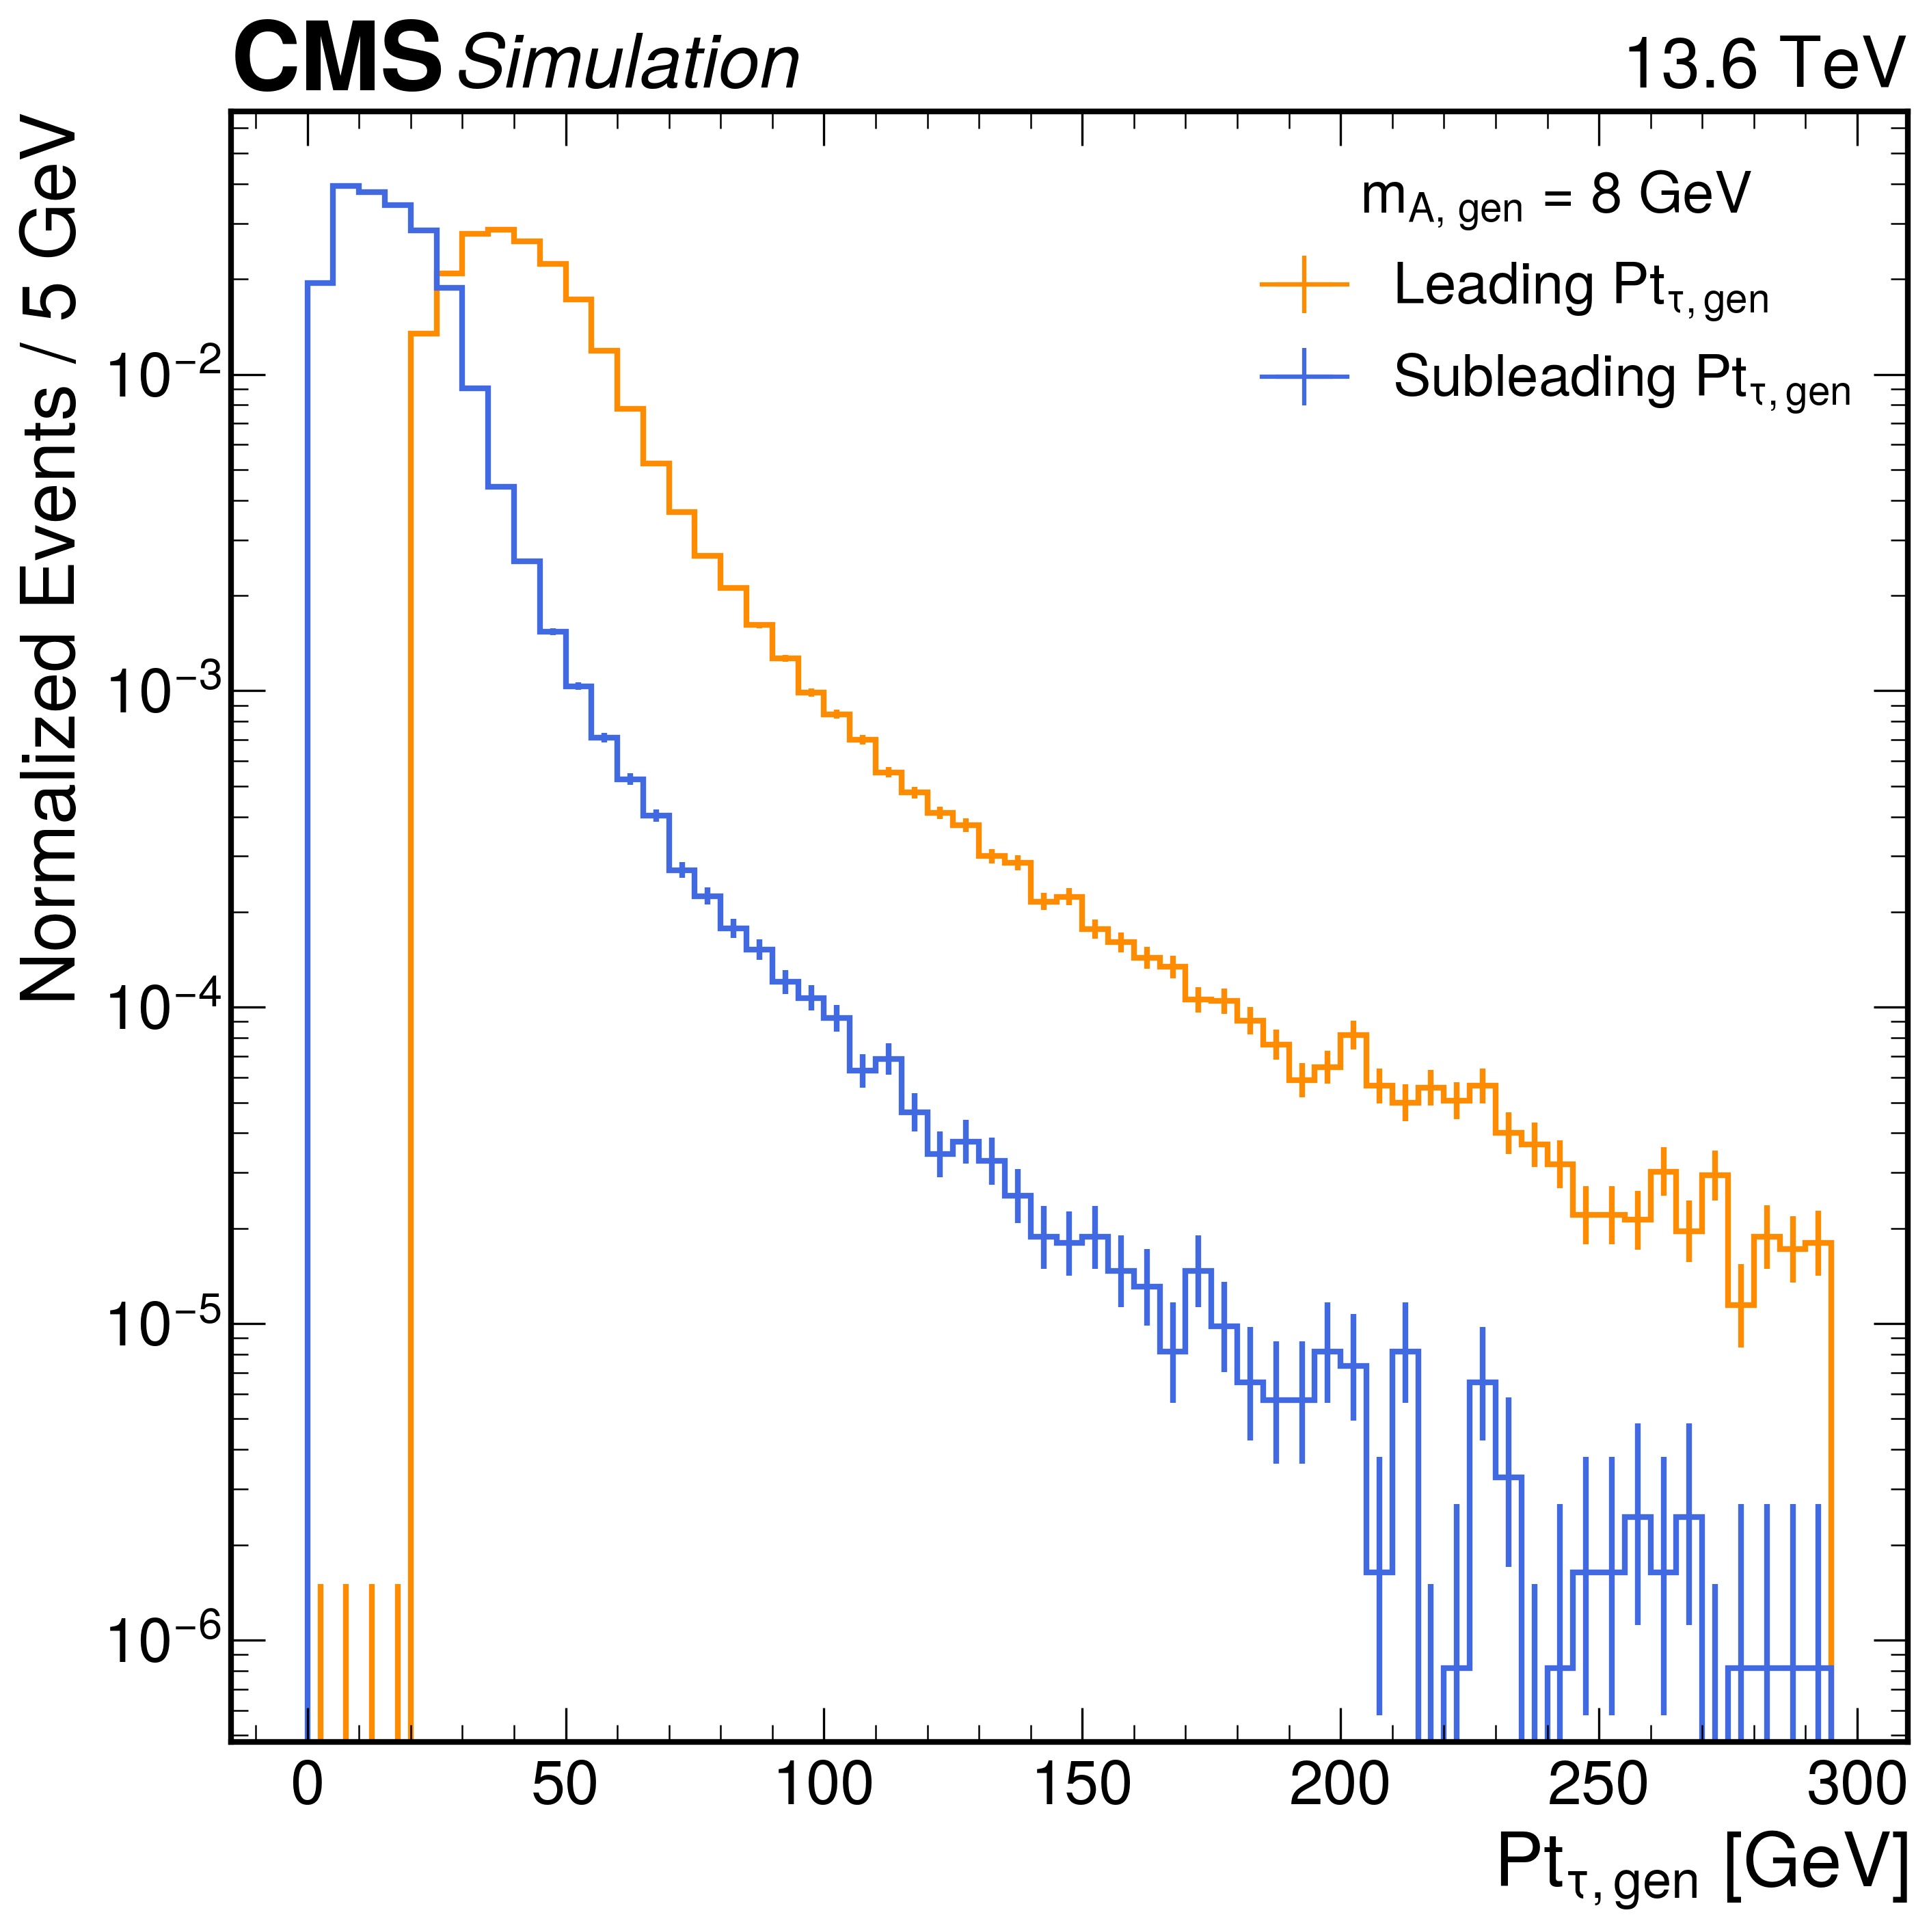

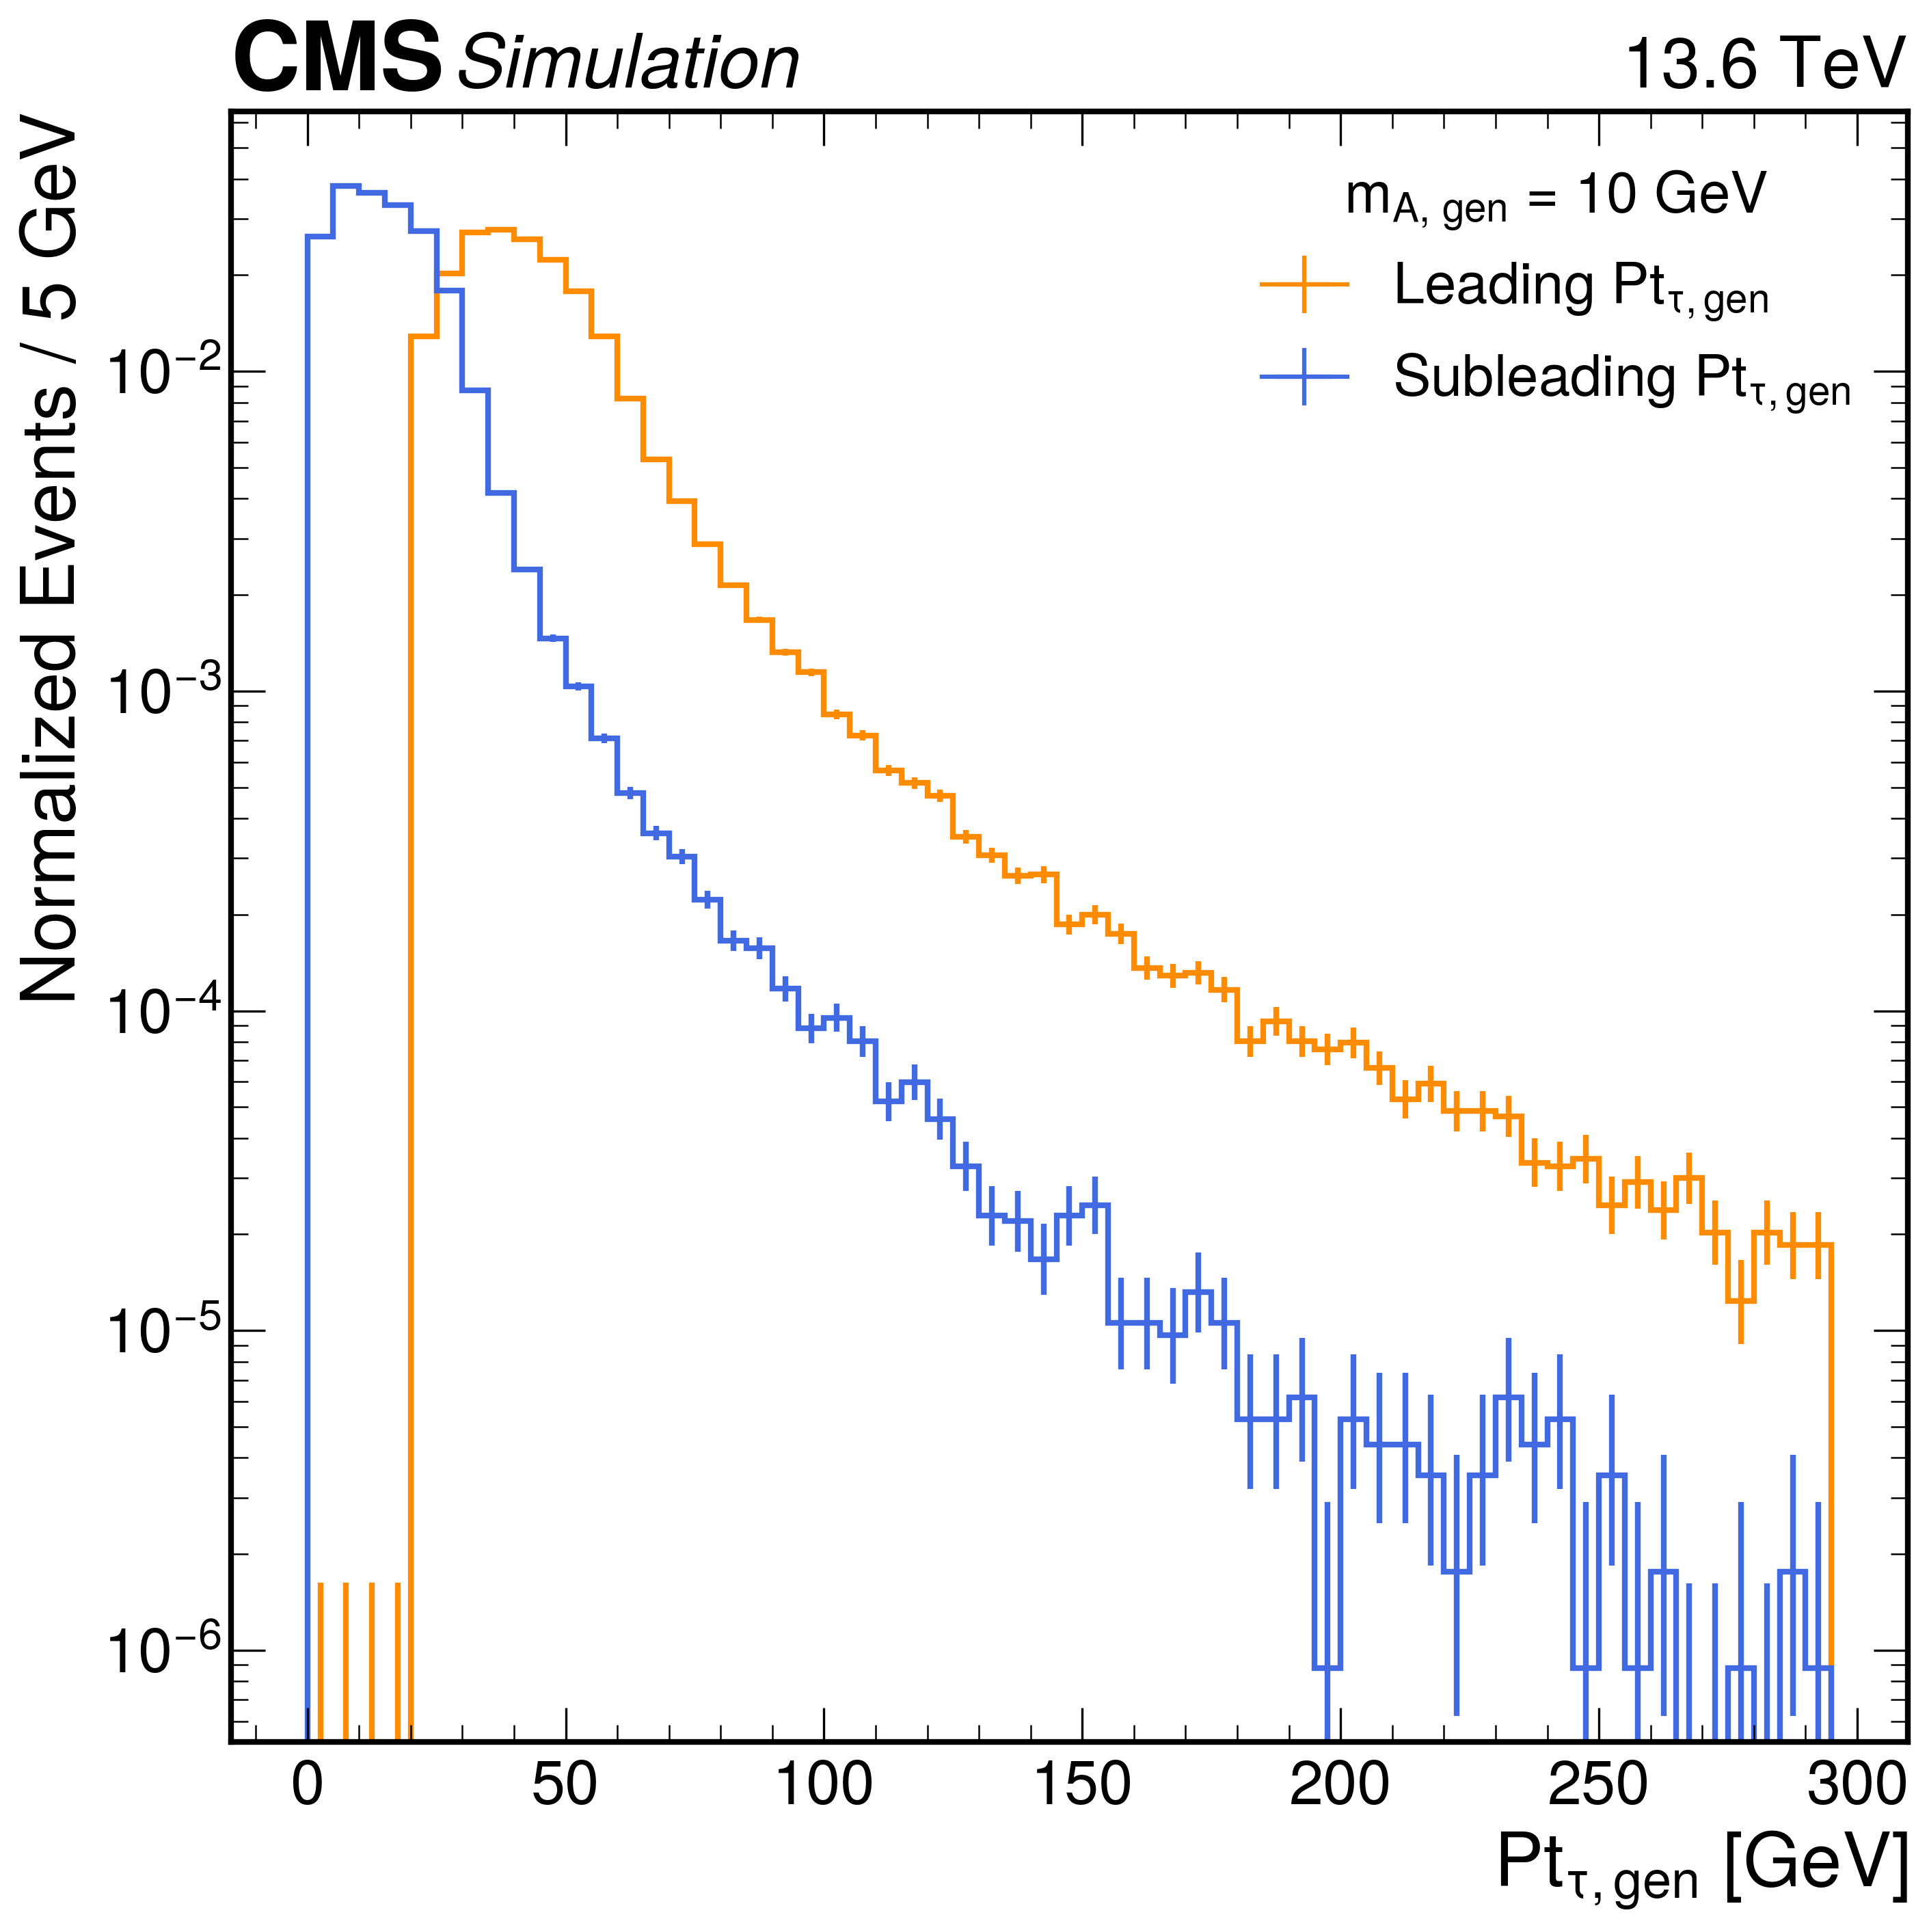

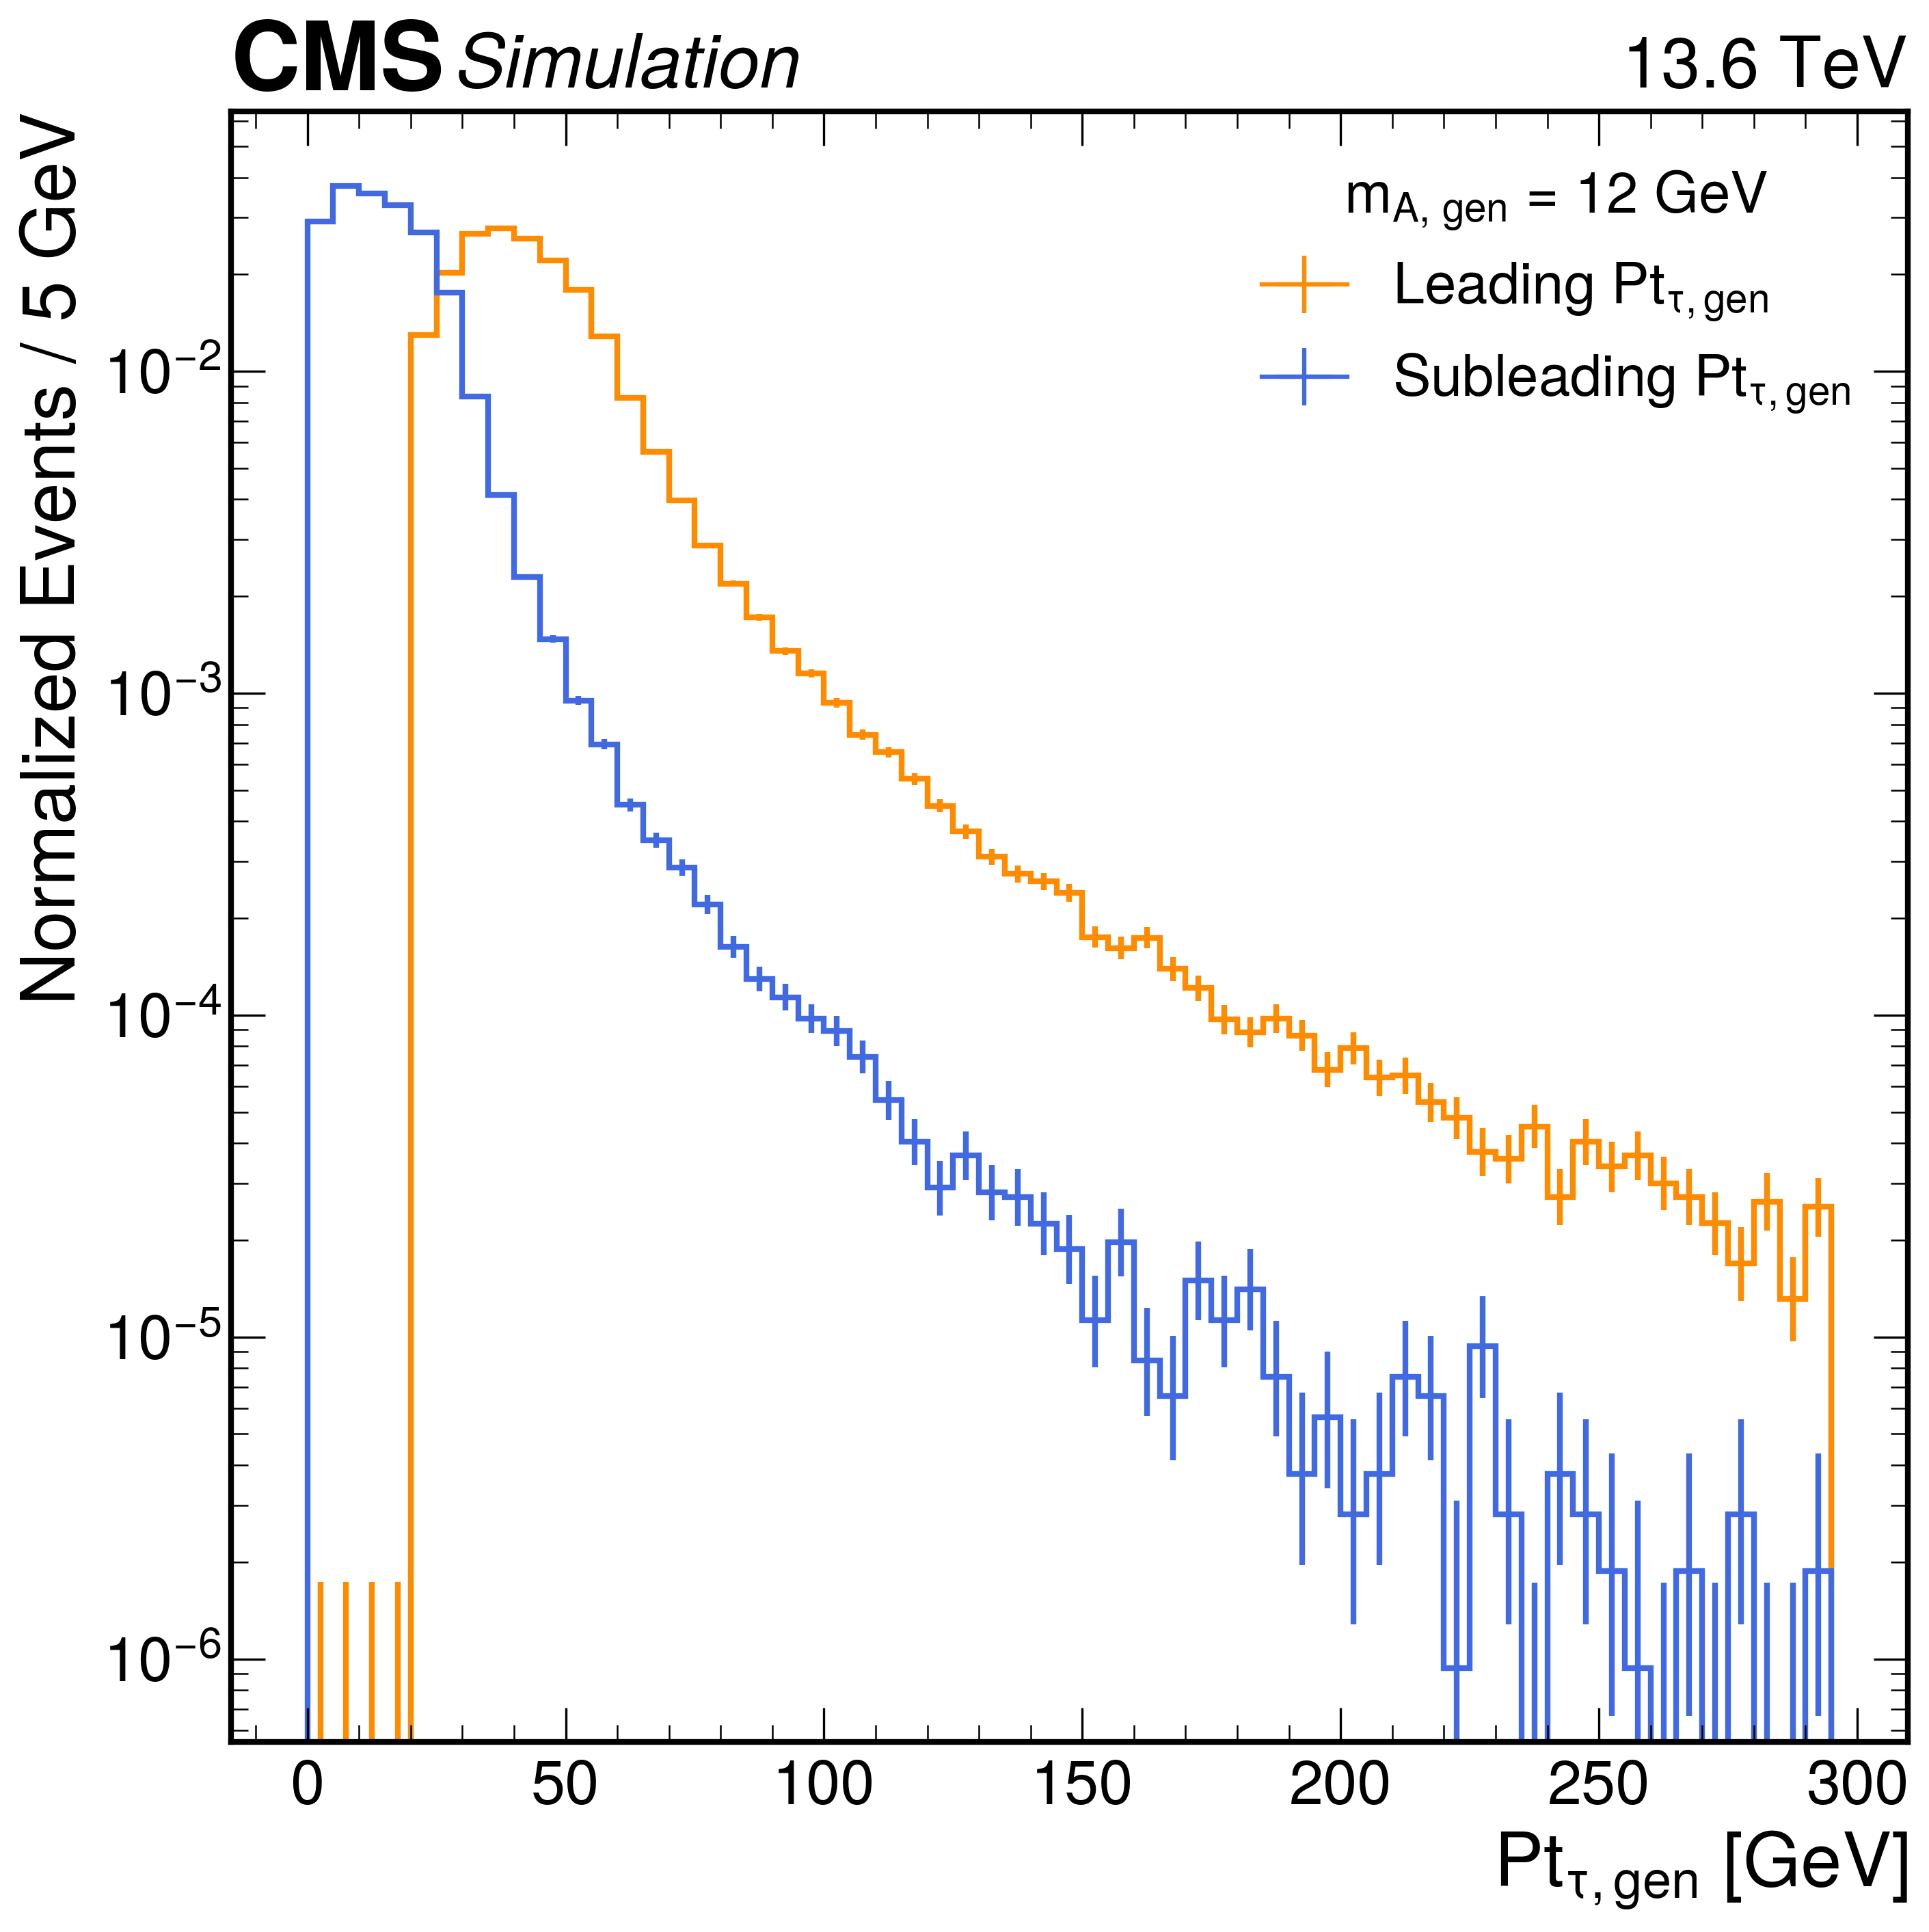

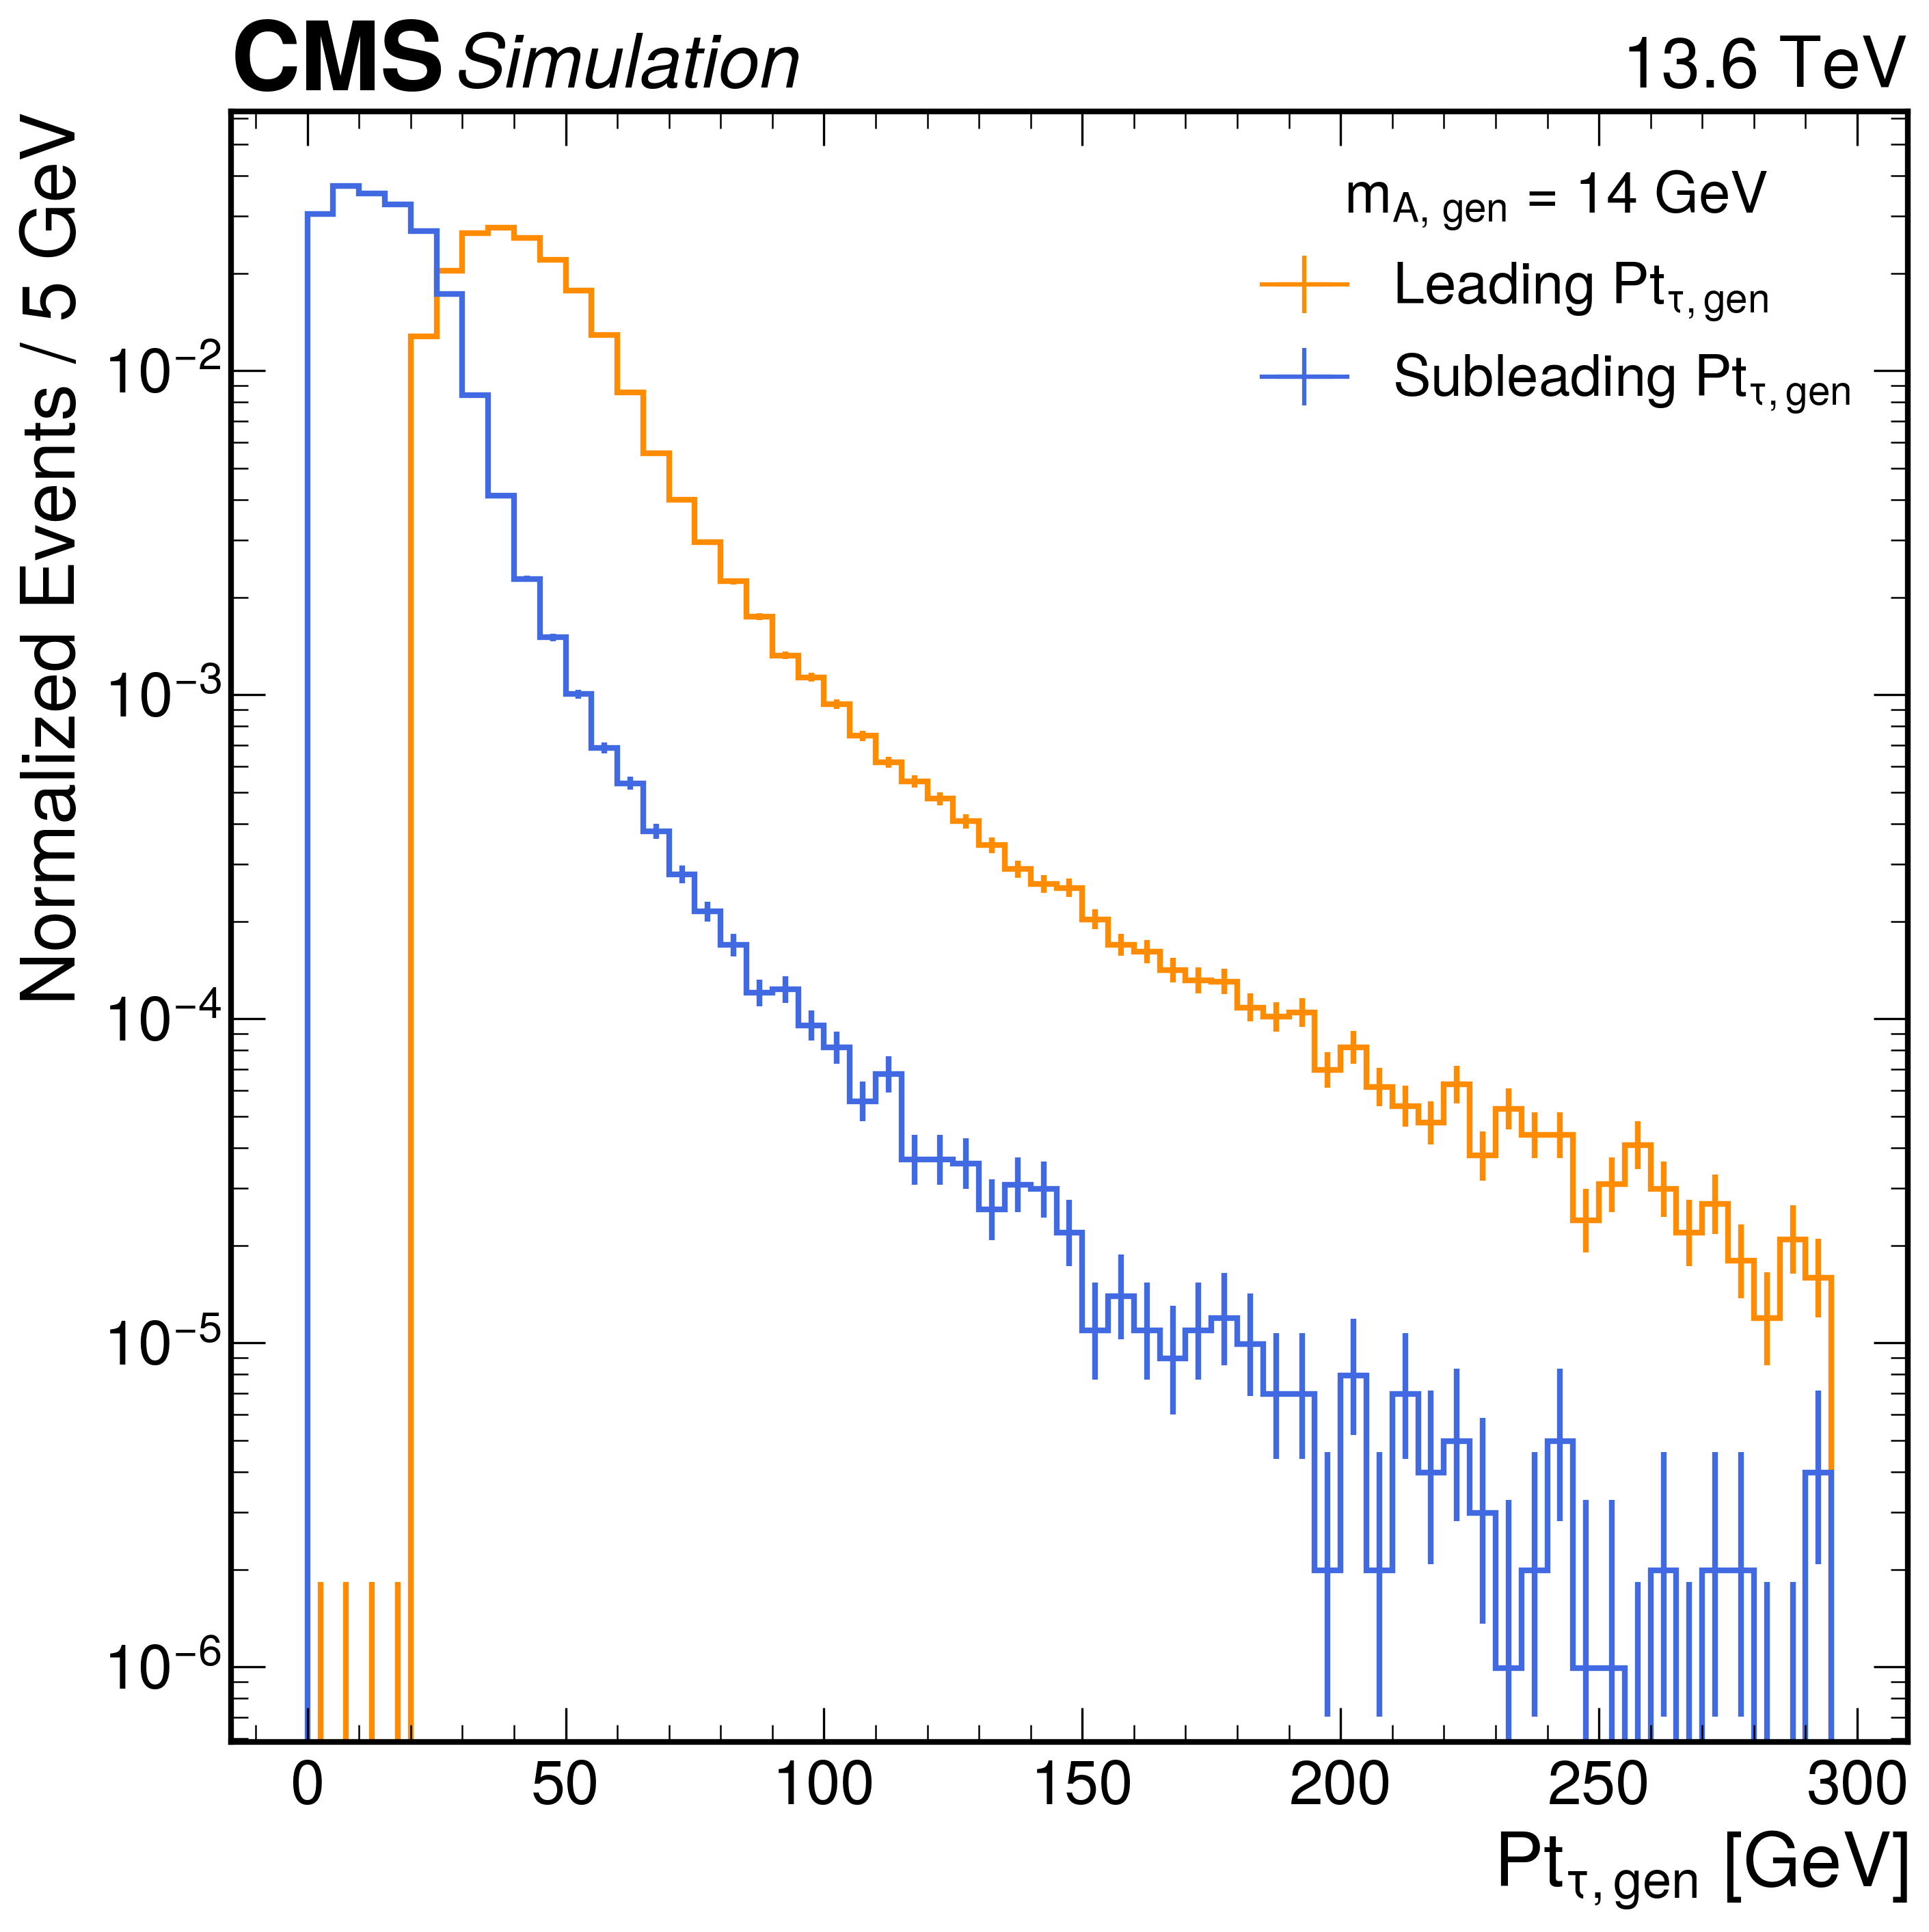

In [6]:
for i, RHTree in enumerate(RHTree_list):
    signal_mass = signal_masses[i]

    # Read Tau1 and Tau2 pT
    Tau1_pt = RHTree.arrays(["Tau1_pt"], "Tau1_pt > -111", library="pd")["Tau1_pt"]
    Tau2_pt = RHTree.arrays(["Tau2_pt"], "Tau2_pt > -111", library="pd")["Tau2_pt"]

    # Compute leading and subleading pT
    pt_leading1 = np.maximum(Tau1_pt, Tau2_pt)
    pt_subleading1 = np.minimum(Tau1_pt, Tau2_pt)
    bins = np.arange(0, 300, 5)
    
    # Plot
    fig, ax = plt.subplots(dpi=300)
    H1= np.histogram(pt_leading1, bins=bins)
    hep.histplot(H1, histtype='step',yerr=True, ax=ax, linestyle='-', linewidth=2, color='darkorange', label=r"Leading $Pt_{\tau, gen}$", density=1)
    H2= np.histogram(pt_subleading1, bins=bins)
    hep.histplot(H2, histtype='step',yerr=True, ax=ax, linewidth=2, color='royalblue', label=r"Subleading $Pt_{\tau, gen}$", density=1)
    # Labels and CMS style
    ax.set_xlabel(r"$Pt_{\tau, gen}$ [GeV]")
    ax.set_ylabel("Normalized Events / 5 GeV")
    legend = ax.legend( loc='upper right',title=f"$m_{{A,\\,gen}}$ = {signal_mass} GeV", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
    hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
    ax.set_yscale('log')
    plt.tight_layout()

    # Save or display
    signal_mass_str = str(signal_mass).replace('.', 'p')
    # plt.savefig(f"{out_dir}/gen_HToAATo4Tau_leading_subleading_tau_pt_signal_mass_{signal_mass_str}_GeV_with_errorbars.pdf", facecolor='w', dpi=300)
    plt.show()


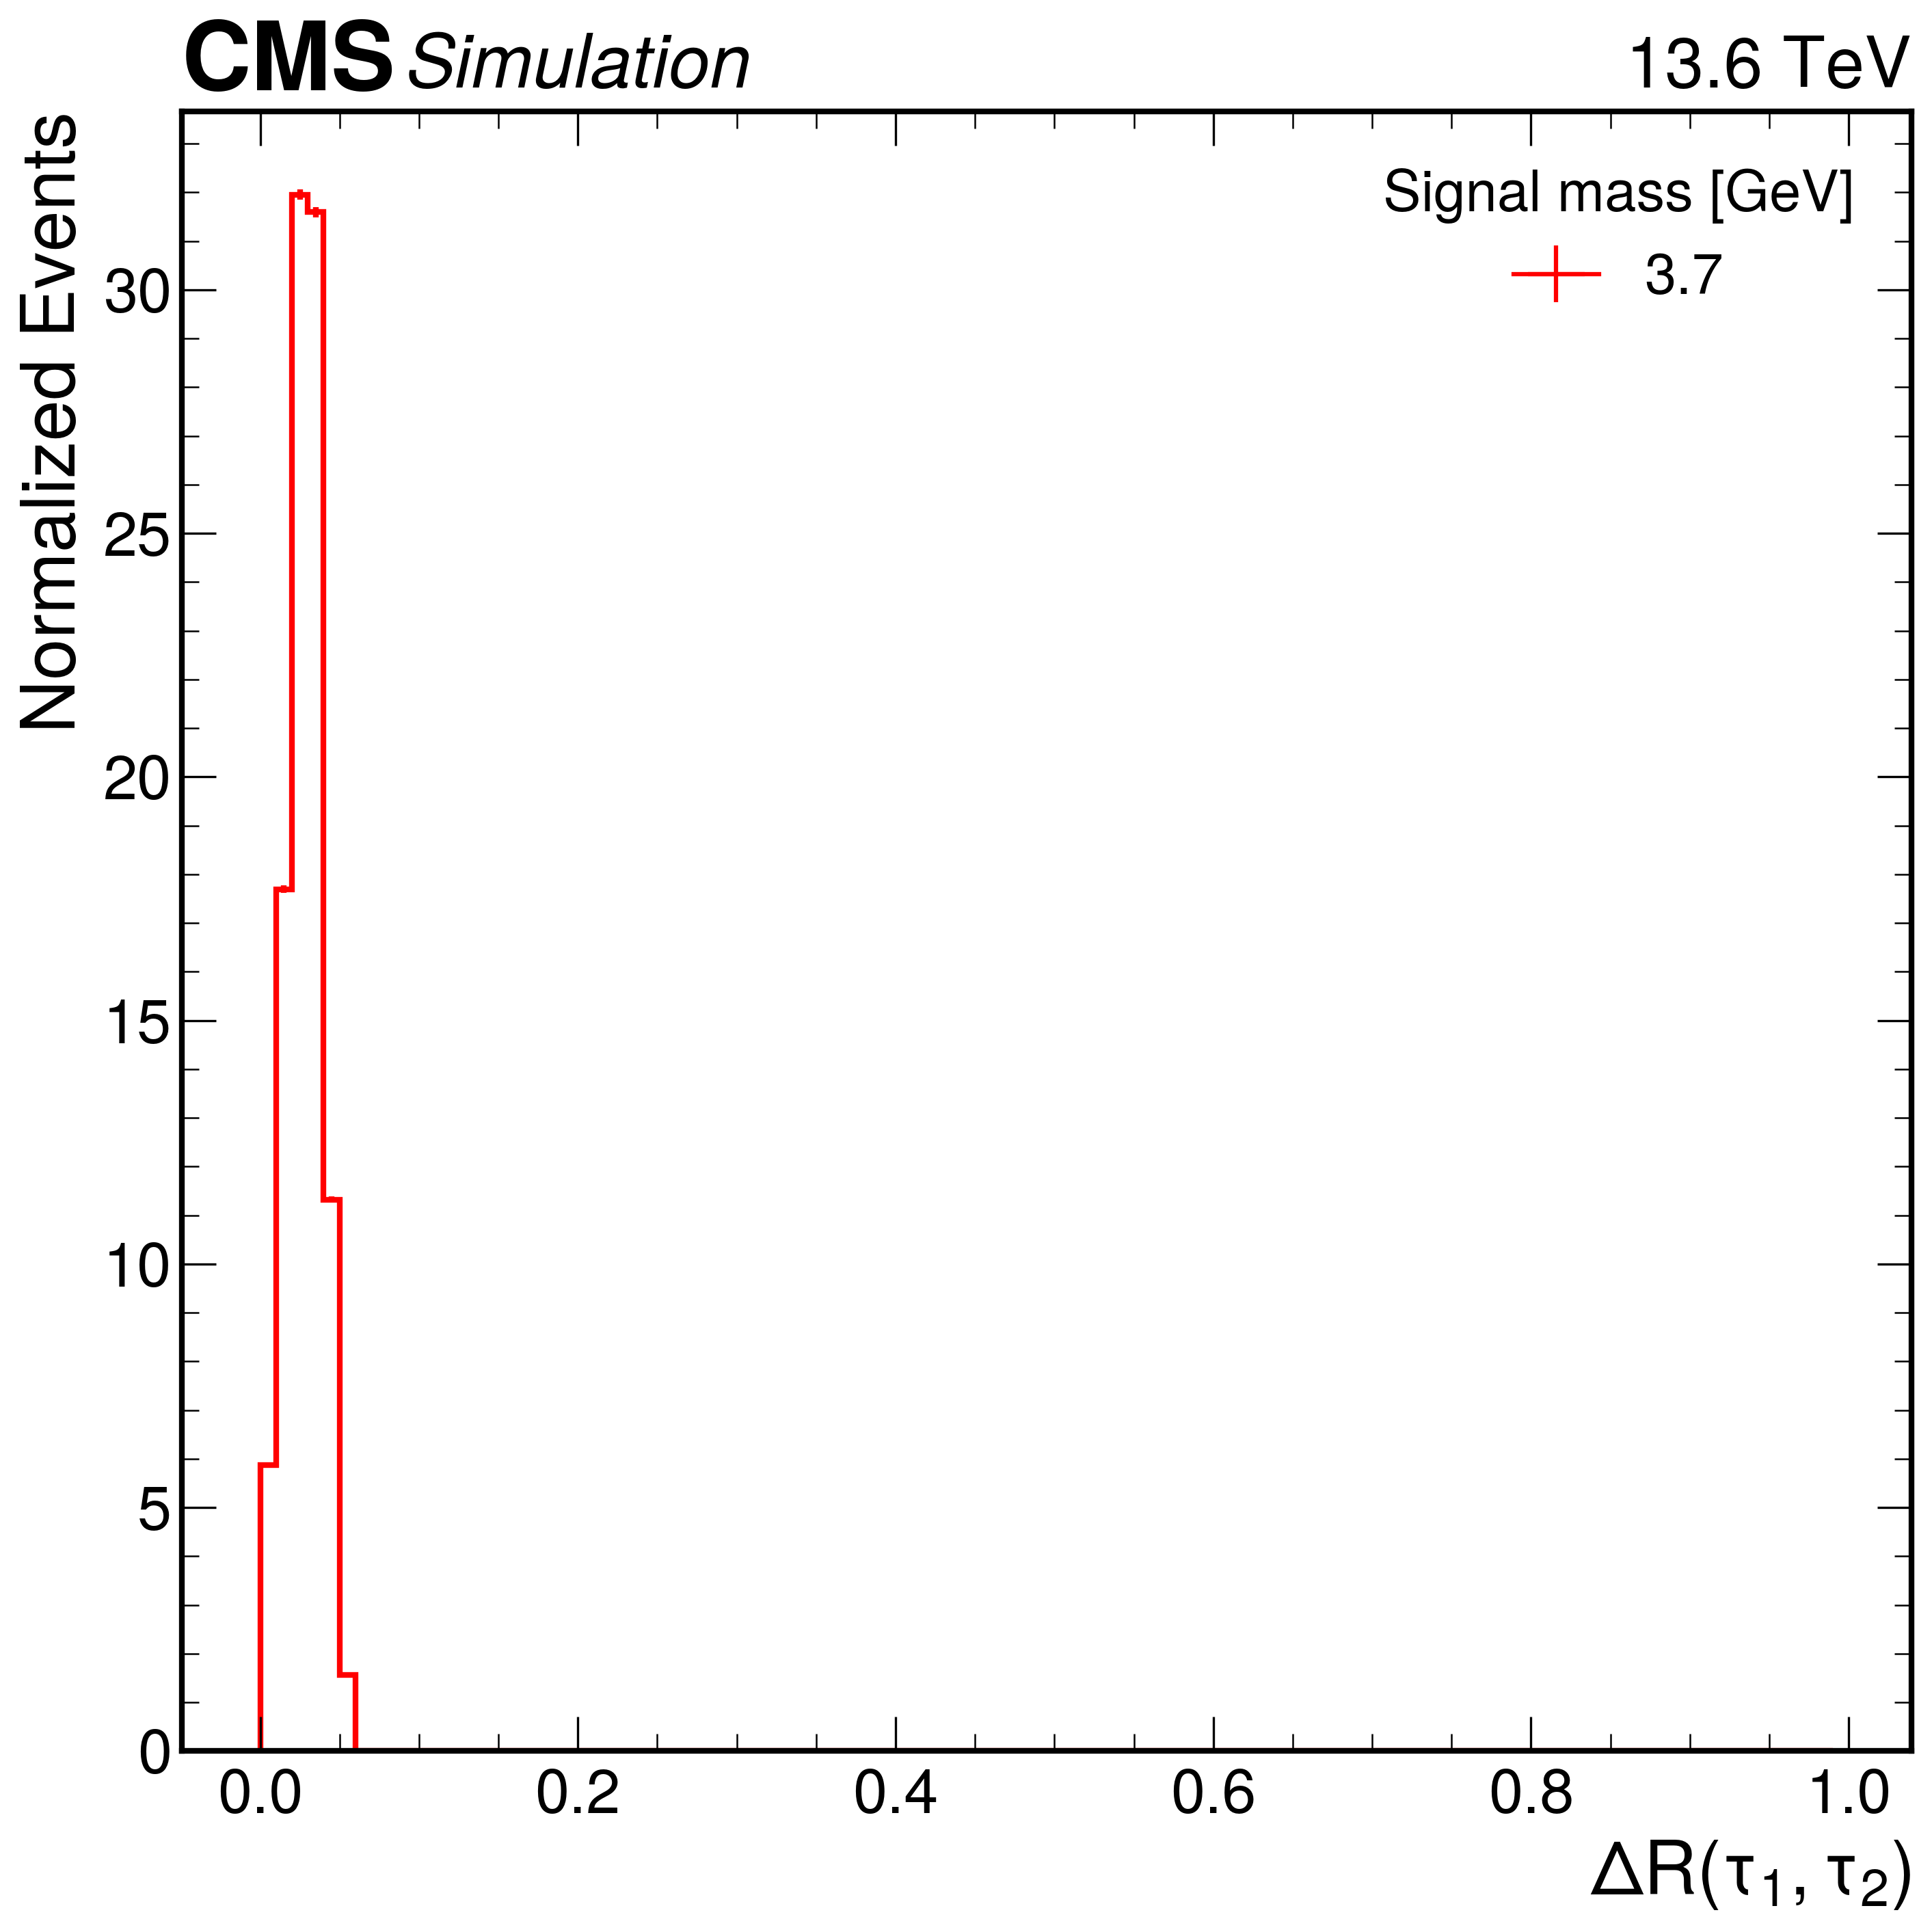

In [43]:
bins = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(dpi=300)

dR_Tua1_Tau2_m3p7 = RHTree_m3p7.arrays(["dR_Tau1_Tau2"], "dR_Tau1_Tau2 > -111", library="pd")["dR_Tau1_Tau2"]
H_m3p7= np.histogram(dR_Tua1_Tau2_m3p7, bins=bins)
hep.histplot(H_m3p7, histtype='step',yerr=True, ax=ax, linestyle='-', linewidth=2, color='r', label=r"3.7", density=True)

# dR_Tua1_Tau2_m4 = RHTree_m4.arrays(["dR_Tau1_Tau2"], "dR_Tau1_Tau2 > -111", library="pd")["dR_Tau1_Tau2"]
# H_m4= np.histogram(dR_Tua1_Tau2_m4, bins=bins)
# hep.histplot(H_m4, histtype='step',yerr=True, ax=ax, linestyle='-', linewidth=2, color='b', label=r"4", density=True)

# Labels and CMS style
ax.set_xlabel(r"$\Delta R (\tau_1, \tau_2)$")
ax.set_ylabel("Normalized Events")
legend = ax.legend( loc='upper right',title=f"Signal mass [GeV]", fontsize=20,title_fontsize=20,frameon=False,fancybox=True )
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
# plt.savefig(f"{out_dir}/gen_HToAATo4Tau_dR_fo_all_signal_mass_errorbars.pdf", facecolor='w', dpi=300)
plt.show()

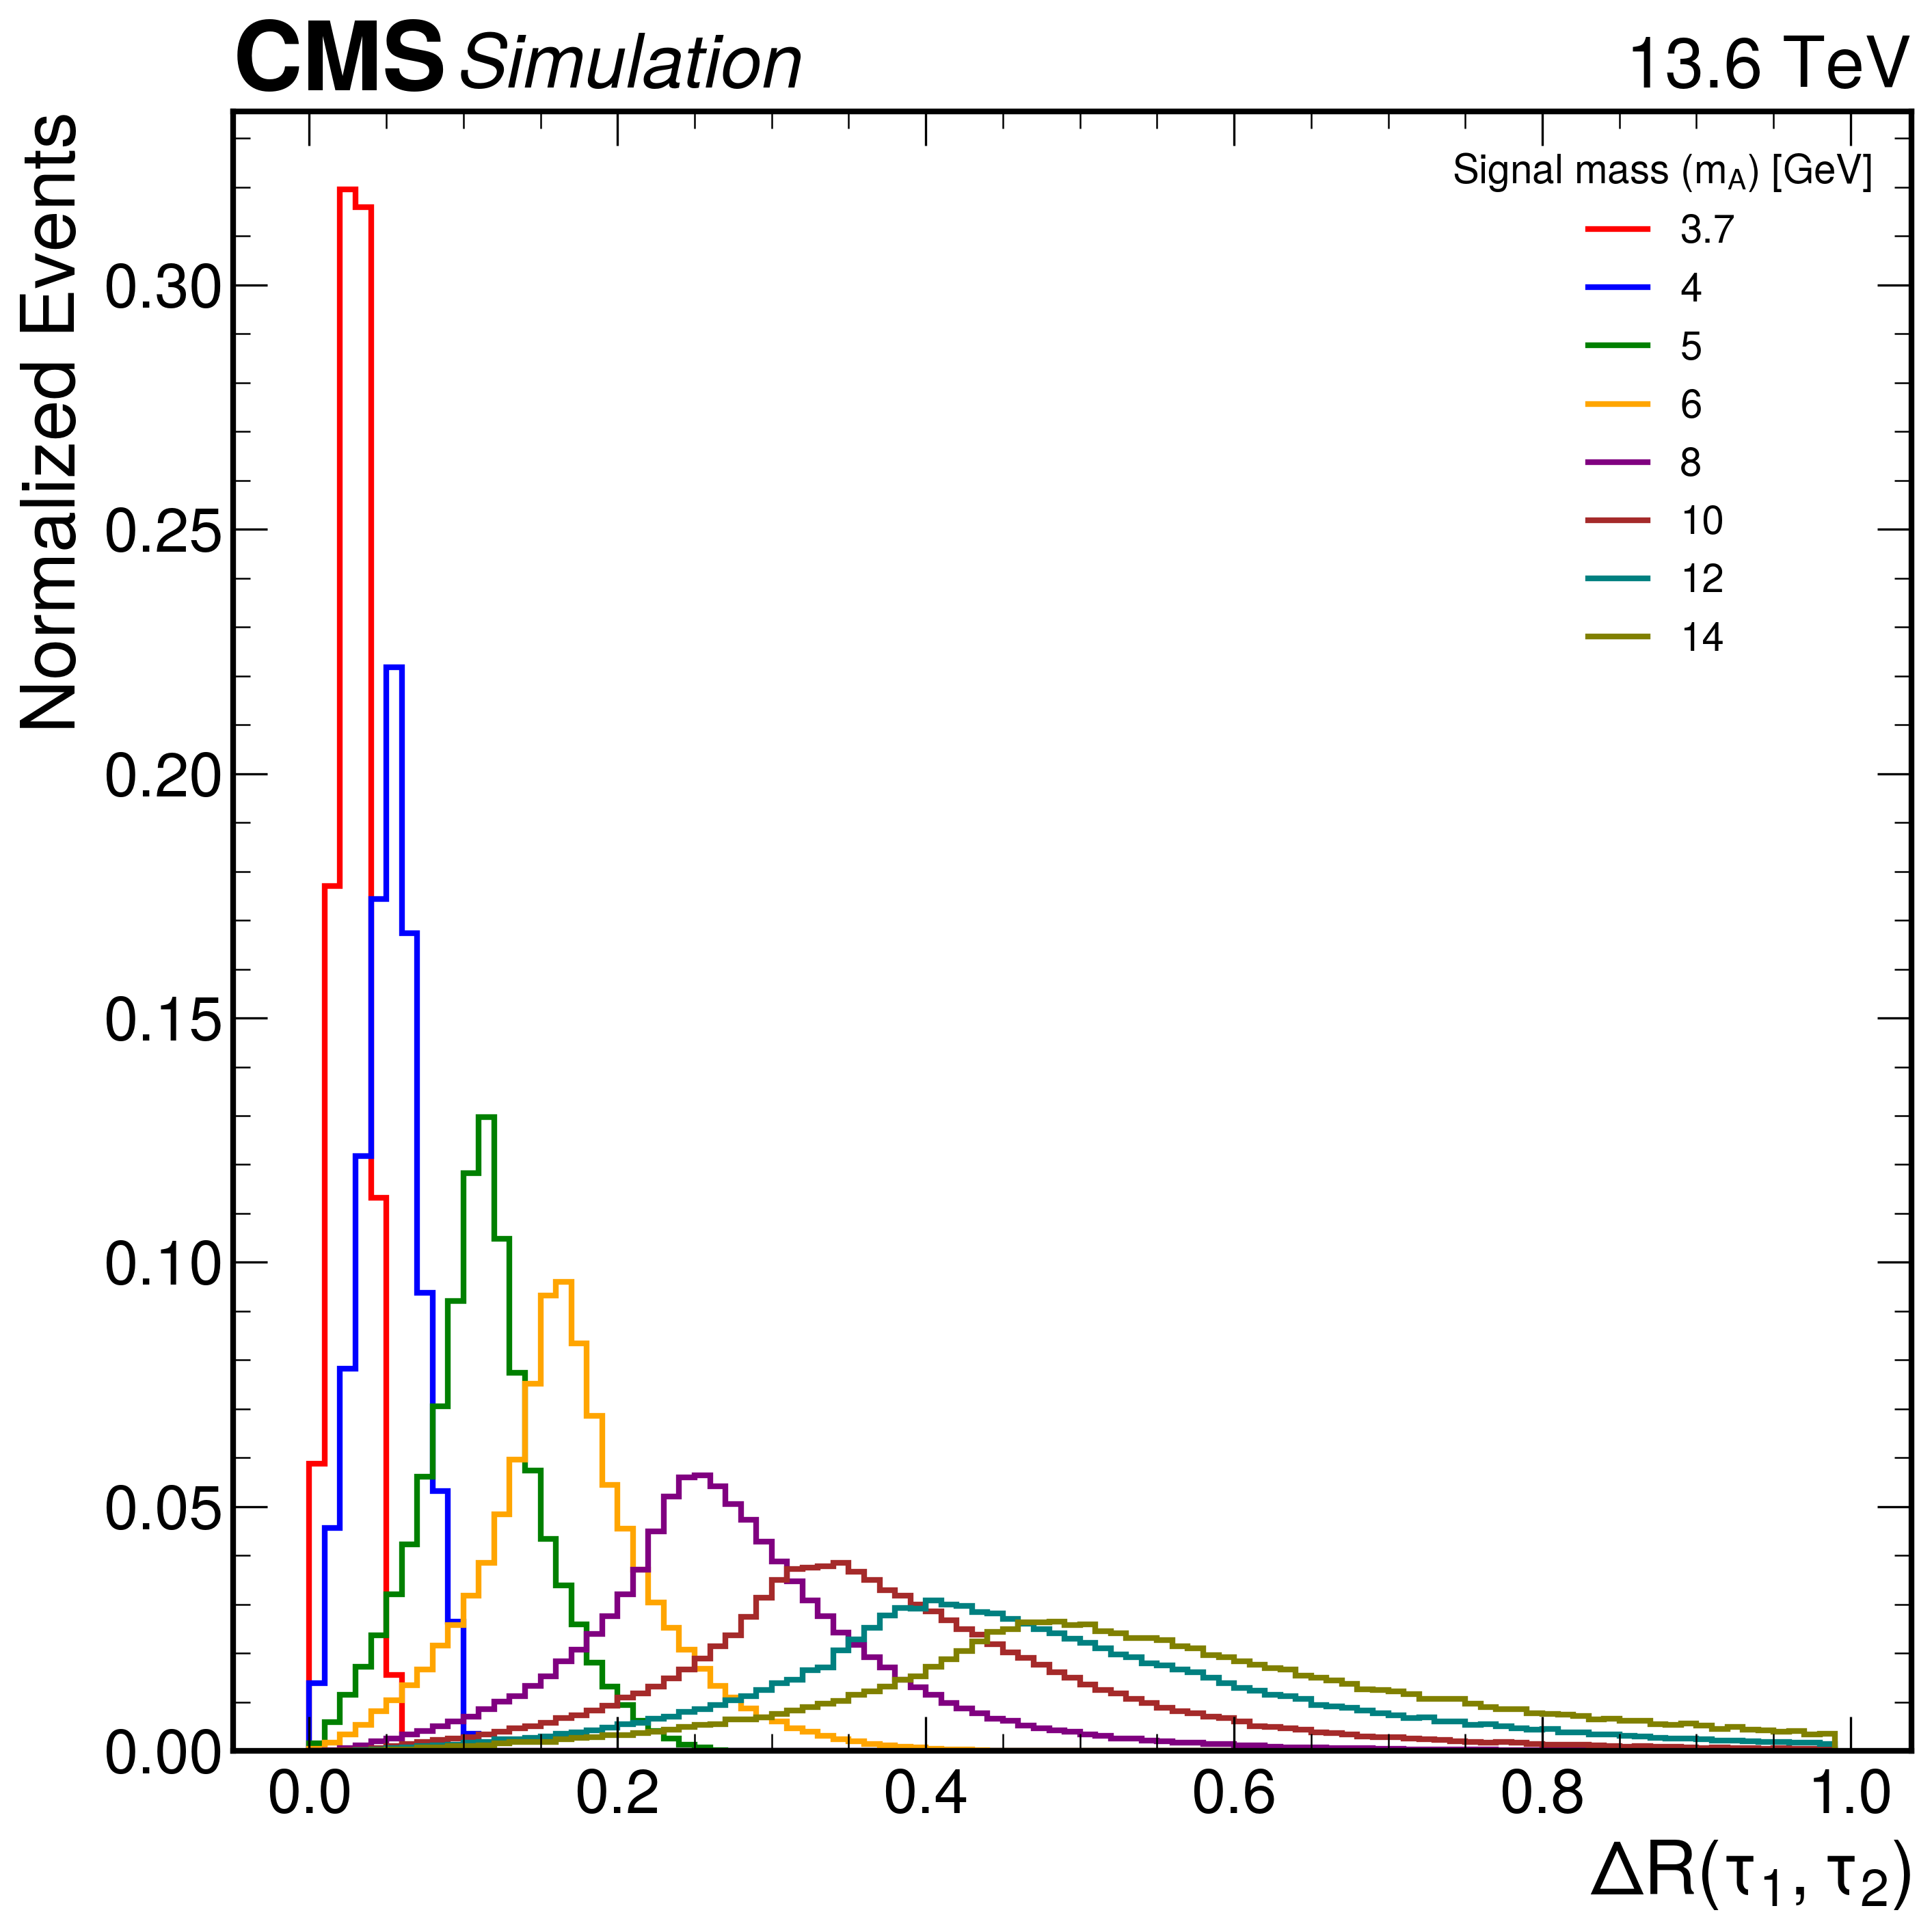

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot

# Load files and trees
file_paths = {
    "3.7": "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M3p7_combined.root",
    "4":   "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M4_combined.root",
    "5":   "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M5_combined.root",
    "6":   "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M6_combined.root",
    "8":   "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M8_combined.root",
    "10":  "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M10_combined.root",
    "12":  "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M12_combined.root",
    "14":  "../analysis_run3/Gen_Trigger_Information/CMSSW_13_0_13/src/Gen/Ntuples/GenInfo_with_trigger_cut_signal_M14_combined.root",
}

# Define colors (extend or cycle if needed)
colors = ['r', 'b', 'g', 'orange', 'purple', 'brown', 'teal', 'olive']

# Initialize plot
bins = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(dpi=300)

# Loop over all signal masses
for i, (mass_label, file_path) in enumerate(file_paths.items()):
    file = uproot.open(file_path)
    tree = file["fevt/RHTree"]
    dR = tree.arrays(["dR_Tau1_Tau2"], "dR_Tau1_Tau2 > -111", library="pd")["dR_Tau1_Tau2"]

    # Histogram and normalization
    counts, bin_edges = np.histogram(dR, bins=bins)
    total = np.sum(counts)
    if total == 0:
        continue  # Skip empty samples

    normalized_counts = counts / total

    # Plot
    hep.histplot((normalized_counts, bin_edges),
                 histtype='step', ax=ax,
                 linestyle='-', linewidth=2, color=colors[i % len(colors)],
                 label=fr"{mass_label}")

# Labels and styling
ax.set_xlabel(r"$\Delta R(\tau_1, \tau_2)$")
ax.set_ylabel("Normalized Events")
ax.legend(loc='upper right', title=r"Signal mass ($m_A$) [GeV]", fontsize=14, title_fontsize=14, frameon=False)
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.tight_layout()
plt.savefig(f"{out_dir}/gen_HToAATo4Tau_dR_fo_all_signal_mass_errorbars.pdf", facecolor='w', dpi=300)
plt.show()
